LOADING AND INSPECTING DATA


# 1. You can ignore all these cells this is what I tried to understand

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# File paths
reddit_file = '/content/drive/MyDrive/pattern project /aggregated_reddit_sentiment.csv'
news_file = '/content/drive/MyDrive/pattern project /processed_news_data.csv'
headlines_file = '/content/drive/MyDrive/pattern project /preprocessed_headlines.csv'
stock_file = '/content/drive/MyDrive/combined_prices.csv'

# Load datasets
reddit_data = pd.read_csv(reddit_file)
news_data = pd.read_csv(news_file)
headlines_data = pd.read_csv(headlines_file)
stock_data = pd.read_csv(stock_file)

# Print basic information about each dataset
print("Reddit Data Info:")
print(reddit_data.info())
print(reddit_data.head())

print("\nNews Data Info:")
print(news_data.info())
print(news_data.head())

print("\nHeadlines Data Info:")
print(headlines_data.info())
print(headlines_data.head())

print("\nStock Data Info:")
print(stock_data.info())
print(stock_data.head())


Reddit Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comment      480 non-null    object 
 1   score        480 non-null    int64  
 2   created_utc  480 non-null    float64
 3   company      480 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.1+ KB
None
                                             comment  score   created_utc  \
0  Some implied moves for earnings next week( up ...     81  1.731858e+09   
1  since I just did the work; you can copy paste ...     67  1.731689e+09   
2  Intuit will say the magic word (AI) and their ...      7  1.732220e+09   
3  Why’s isn’t intuit down more? That’s a shitty ...      5  1.732225e+09   
4  I wanna buy INTU puts cause trump wants to abo...      3  1.732213e+09   

  company  
0    intu  
1    intu  
2    intu  
3    intu  
4    intu  

News Data Info:
<class

In [ ]:
print("Checking for duplicates...")
print(f"Reddit Data Duplicates: {reddit_data.duplicated().sum()}")
print(f"News Data Duplicates: {news_data.duplicated().sum()}")
print(f"Headlines Data Duplicates: {headlines_data.duplicated().sum()}")
print(f"Stock Data Duplicates: {stock_data.duplicated().sum()}")


Checking for duplicates...
Reddit Data Duplicates: 0
News Data Duplicates: 0
Headlines Data Duplicates: 0
Stock Data Duplicates: 0


In [ ]:
print("Checking for missing values...")
print("Reddit Data Missing Values:")
print(reddit_data.isnull().sum())

print("\nNews Data Missing Values:")
print(news_data.isnull().sum())

print("\nHeadlines Data Missing Values:")
print(headlines_data.isnull().sum())

print("\nStock Data Missing Values:")
print(stock_data.isnull().sum())


Checking for missing values...
Reddit Data Missing Values:
comment        0
score          0
created_utc    0
company        0
dtype: int64

News Data Missing Values:
Company      0
Title        0
Published    0
Source       0
Summary      0
dtype: int64

Headlines Data Missing Values:
Headline    0
Date        0
Company     0
dtype: int64

Stock Data Missing Values:
Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
Company    0
dtype: int64


In [ ]:
# Example fixes:
# Rename columns for consistency
reddit_data.rename(columns={'created_utc': 'date'}, inplace=True)
news_data.rename(columns={'Published': 'date'}, inplace=True)

# Convert date columns to datetime
reddit_data['date'] = pd.to_datetime(reddit_data['date'], errors='coerce')
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
headlines_data['Date'] = pd.to_datetime(headlines_data['Date'], errors='coerce')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

# Fill missing values
reddit_data.fillna({'comment': 'Unknown', 'score': 0, 'company': 'Unknown'}, inplace=True)
news_data.fillna({'Title': 'Unknown', 'Summary': 'Unknown', 'Company': 'Unknown'}, inplace=True)
headlines_data.fillna({'Headline': 'Unknown', 'Company': 'Unknown'}, inplace=True)
stock_data.fillna({'Open': 0, 'Close': 0, 'High': 0, 'Low': 0, 'Volume': 0}, inplace=True)


INTEGRATION CODE

Step 1: Standardizing and cleaning the  Reddit Data

In [ ]:
print(reddit_data.columns)


Index(['comment', 'score', 'date', 'company'], dtype='object')


In [ ]:
reddit_data.head()


,comment,score,date,company
0,Some implied moves for earnings next week( up ...,81,1970-01-01 00:00:01.731858258,intu
1,since I just did the work; you can copy paste ...,67,1970-01-01 00:00:01.731689397,intu
2,Intuit will say the magic word (AI) and their ...,7,1970-01-01 00:00:01.732219596,intu
3,Why’s isn’t intuit down more? That’s a shitty ...,5,1970-01-01 00:00:01.732225079,intu
4,I wanna buy INTU puts cause trump wants to abo...,3,1970-01-01 00:00:01.732212863,intu


In [ ]:
import pandas as pd
from datetime import datetime

# Load Reddit Data
reddit_data = pd.read_csv('/content/drive/MyDrive/combined_reddit.csv')

# Check if 'created_utc' column exists
if 'created_utc' in reddit_data.columns:
    # Convert UNIX timestamps to human-readable date format
    reddit_data['date'] = reddit_data['created_utc'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
    # Drop the 'created_utc' column as it's no longer needed
    reddit_data.drop(columns=['created_utc'], inplace=True)
else:
    print("Warning: 'created_utc' column not found. Using existing 'date' column.")

# Rename columns for consistency
reddit_data = reddit_data.rename(columns={
    'comment': 'text',  # Rename 'comment' to 'text'
    'score': 'sentiment_score'  # Rename 'score' to 'sentiment_score'
})

# Inspect the cleaned data
print(reddit_data.head())

# Save the cleaned Reddit data
reddit_data.to_csv('/content/cleaned_reddit_data.csv', index=False)
print("Cleaned Reddit data saved as 'cleaned_reddit_data.csv'.")


                                                text  sentiment_score company  \
0  Some implied moves for earnings next week( up ...               81    intu   
1  since I just did the work; you can copy paste ...               67    intu   
2  Intuit will say the magic word (AI) and their ...                7    intu   
3  Why’s isn’t intuit down more? That’s a shitty ...                5    intu   
4  I wanna buy INTU puts cause trump wants to abo...                3    intu   

         date  
0  2024-11-17  
1  2024-11-15  
2  2024-11-21  
3  2024-11-21  
4  2024-11-21  
Cleaned Reddit data saved as 'cleaned_reddit_data.csv'.


feature extraction for reddit data


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load cleaned Reddit data
reddit_data = pd.read_csv("/content/drive/MyDrive/cleaned_reddit_data.csv")

# Load RoBERTa model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to perform sentiment analysis using RoBERTa
def analyze_sentiment_roberta(comment):
    inputs = tokenizer(comment, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probabilities = softmax(outputs.logits, dim=-1).detach().numpy()[0]
    # Calculate sentiment score: Positive - Negative
    sentiment_score = probabilities[2] - probabilities[0]
    return sentiment_score

# Apply sentiment analysis on Reddit comments
print("Performing sentiment analysis on Reddit comments...")
reddit_data['sentiment_score_roberta'] = reddit_data['text'].apply(lambda x: analyze_sentiment_roberta(str(x)))

# Create a weighted sentiment score
reddit_data['weighted_sentiment'] = reddit_data['sentiment_score_roberta'] * reddit_data['sentiment_score']

# Aggregate sentiment scores by company and date
aggregated_reddit_sentiment = reddit_data.groupby(['company', 'date']).agg(
    total_weighted_sentiment=('weighted_sentiment', 'sum'),
    avg_sentiment=('sentiment_score_roberta', 'mean'),
    total_upvotes=('sentiment_score', 'sum')
).reset_index()

# Save the aggregated sentiment data
aggregated_reddit_sentiment.to_csv("aggregated_reddit_sentiment.csv", index=False)
print("Aggregated Reddit sentiment data saved as 'aggregated_reddit_sentiment.csv'.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Performing sentiment analysis on Reddit comments...
Aggregated Reddit sentiment data saved as 'aggregated_reddit_sentiment.csv'.


Review Aggregated Sentiments

Aggregated Reddit Sentiment Data:
  company        date  total_weighted_sentiment  avg_sentiment  total_upvotes
0    intu  2024-11-15                 -0.349585      -0.149441             71
1    intu  2024-11-17                 -5.745800      -0.070936             81
2    intu  2024-11-19                 -0.085002      -0.042501              2
3    intu  2024-11-21                -10.021760      -0.293731             28
4    intu  2024-11-22                 -0.404052      -0.404052              1

Summary Statistics:
       total_weighted_sentiment  avg_sentiment  total_upvotes
count                 59.000000      59.000000      59.000000
mean                  -5.125723      -0.157015      88.525424
std                   24.456183       0.288348     141.987294
min                 -171.534784      -0.857315       1.000000
25%                   -5.249410      -0.304825       9.000000
50%                   -0.882016      -0.106702      53.000000
75%                    0.532529       0.007

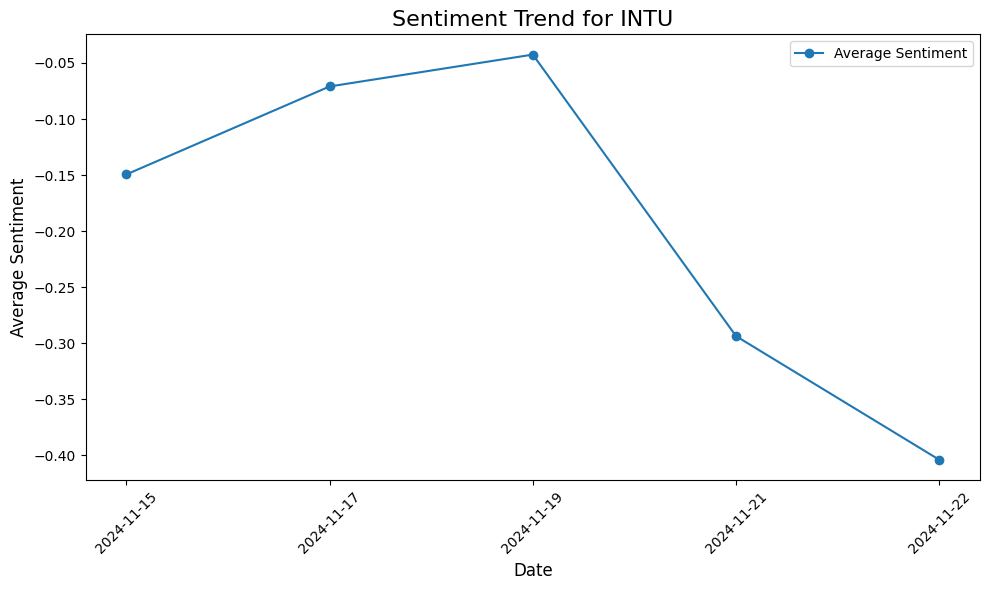

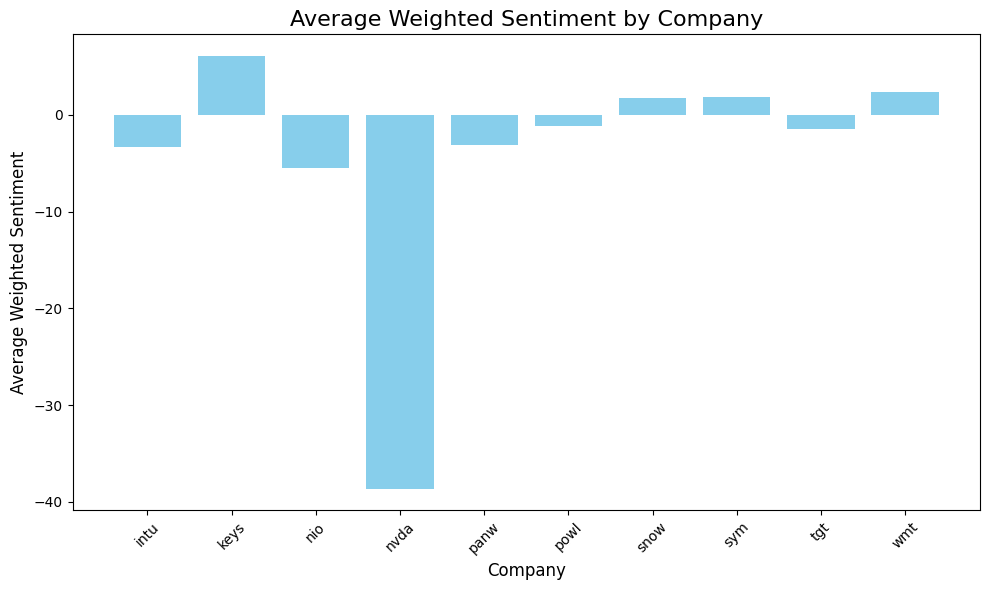

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load aggregated sentiment data
aggregated_reddit_sentiment = pd.read_csv("aggregated_reddit_sentiment.csv")

# Display the first few rows
print("Aggregated Reddit Sentiment Data:")
print(aggregated_reddit_sentiment.head())

# Summary statistics
print("\nSummary Statistics:")
print(aggregated_reddit_sentiment.describe())

# Visualization: Sentiment trend for a specific company
company_to_visualize = "intu"  # Change this to the company you want to visualize
company_data = aggregated_reddit_sentiment[aggregated_reddit_sentiment['company'] == company_to_visualize]

plt.figure(figsize=(10, 6))
plt.plot(company_data['date'], company_data['avg_sentiment'], marker='o', label='Average Sentiment')
plt.xticks(rotation=45)
plt.title(f"Sentiment Trend for {company_to_visualize.upper()}", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Sentiment", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization: Compare total weighted sentiment across companies
company_comparison = aggregated_reddit_sentiment.groupby('company')['total_weighted_sentiment'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(company_comparison['company'], company_comparison['total_weighted_sentiment'], color='skyblue')
plt.title("Average Weighted Sentiment by Company", fontsize=16)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Average Weighted Sentiment", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


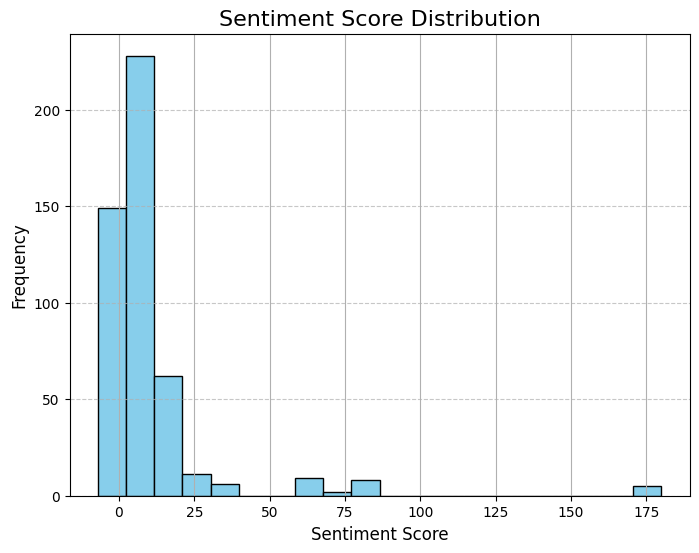

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
reddit_data['sentiment_score'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Sentiment Score Distribution", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
comparison = reddit_data[['sentiment_score', 'finbert_sentiment']].head(20)
print(comparison)


    sentiment_score finbert_sentiment
0                81          Negative
1                67          Negative
2                 7          Negative
3                 5          Negative
4                 3          Negative
5                 3          Positive
6                 4          Negative
7                 2          Negative
8                 2          Negative
9                 2          Negative
10                1          Negative
11                1           Neutral
12                0          Negative
13                2          Negative
14                1          Negative
15                1          Negative
16                1          Negative
17               67          Negative
18                5           Neutral
19                2           Neutral


In [ ]:
reddit_data.head()

,text,sentiment_score,company,date,sentiment_score_roberta,weighted_sentiment,finbert_sentiment
0,Some implied moves for earnings next week( up ...,81,intu,2024-11-17,-0.070936,-5.745800,Negative
1,since I just did the work; you can copy paste ...,67,intu,2024-11-15,-0.001532,-0.102649,Negative
2,Intuit will say the magic word (AI) and their ...,7,intu,2024-11-21,0.090870,0.636093,Negative
3,Why’s isn’t intuit down more? That’s a shitty ...,5,intu,2024-11-21,-0.942362,-4.711812,Negative
4,I wanna buy INTU puts cause trump wants to abo...,3,intu,2024-11-21,-0.901316,-2.703947,Negative


In [ ]:
print(reddit_data[['sentiment_score_roberta', 'finbert_sentiment']].value_counts())


sentiment_score_roberta  finbert_sentiment
-0.001532                Negative             10
-0.070936                Negative              8
 0.022773                Neutral               5
 0.175673                Negative              3
 0.071427                Negative              3
                                              ..
-0.219840                Negative              1
-0.220300                Negative              1
-0.239071                Positive              1
-0.248366                Negative              1
 0.976764                Neutral               1
Name: count, Length: 437, dtype: int64


In [ ]:
reddit_data.head()

,text,sentiment_score,company,date,sentiment_score_roberta,weighted_sentiment,finbert_sentiment
0,Some implied moves for earnings next week( up ...,81,intu,2024-11-17,-0.070936,-5.745800,Negative
1,since I just did the work; you can copy paste ...,67,intu,2024-11-15,-0.001532,-0.102649,Negative
2,Intuit will say the magic word (AI) and their ...,7,intu,2024-11-21,0.090870,0.636093,Negative
3,Why’s isn’t intuit down more? That’s a shitty ...,5,intu,2024-11-21,-0.942362,-4.711812,Negative
4,I wanna buy INTU puts cause trump wants to abo...,3,intu,2024-11-21,-0.901316,-2.703947,Negative


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load Reddit data
reddit_file = '/content/drive/MyDrive/cleaned_reddit_data.csv'
reddit_data = pd.read_csv(reddit_file)

# Step 1: Remove Previously Extracted Features
columns_to_remove = ['sentiment_score', 'sentiment_score_roberta', 'weighted_sentiment', 'finbert_sentiment']
reddit_data = reddit_data.drop(columns=[col for col in columns_to_remove if col in reddit_data.columns], errors='ignore')

# Debug: Check if columns are removed
print("Columns after removal:", reddit_data.columns)

# Step 2: Preprocess Text
def preprocess_text(text):
    import re
    if pd.isna(text):  # Handle NaN values
        return ""
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase
    text = text.lower()
    return text

reddit_data['text'] = reddit_data['text'].apply(preprocess_text)

# Step 3: Recalculate Sentiment Using Twitter-RoBERTa
def analyze_sentiment_roberta(comments):
    model_name = "cardiffnlp/twitter-roberta-base-sentiment"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    sentiment_scores = []
    for comment in comments:
        inputs = tokenizer(comment, return_tensors="pt", truncation=True, padding=True, max_length=512)
        outputs = model(**inputs)
        probabilities = softmax(outputs.logits, dim=-1).detach().numpy()[0]
        sentiment_score = probabilities[2] - probabilities[0]  # Positive - Negative
        sentiment_scores.append(sentiment_score)
    return sentiment_scores

# Apply RoBERTa sentiment analysis
print("Analyzing sentiment using Twitter-RoBERTa...")
reddit_data['sentiment_score_roberta'] = analyze_sentiment_roberta(reddit_data['text'])

# Step 4: Assign Sentiment Labels
def sentiment_label(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

reddit_data['sentiment_label'] = reddit_data['sentiment_score_roberta'].apply(sentiment_label)

# Step 5: Save the Updated Data
reddit_data.to_csv('/content/aggregated_reddit_sentiment.csv', index=False)

# Debug: Display the head of the updated data
print("Updated Reddit Data with RoBERTa Sentiment:")
print(reddit_data.head())


Columns after removal: Index(['text', 'company', 'date'], dtype='object')
Analyzing sentiment using Twitter-RoBERTa...
Updated Reddit Data with RoBERTa Sentiment:
                                                text company        date  \
0  some implied moves for earnings next week up o...    intu  2024-11-17   
1  since i just did the work you can copy paste t...    intu  2024-11-15   
2  intuit will say the magic word ai and their st...    intu  2024-11-21   
3   whys isnt intuit down more thats a shitty report    intu  2024-11-21   
4  i wanna buy intu puts cause trump wants to abo...    intu  2024-11-21   

   sentiment_score_roberta sentiment_label  
0                -0.016455         Neutral  
1                -0.050959        Negative  
2                -0.101724        Negative  
3                -0.963469        Negative  
4                -0.933187        Negative  


<ipython-input-18-a5f89a3ca031>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=reddit_data, palette='viridis')


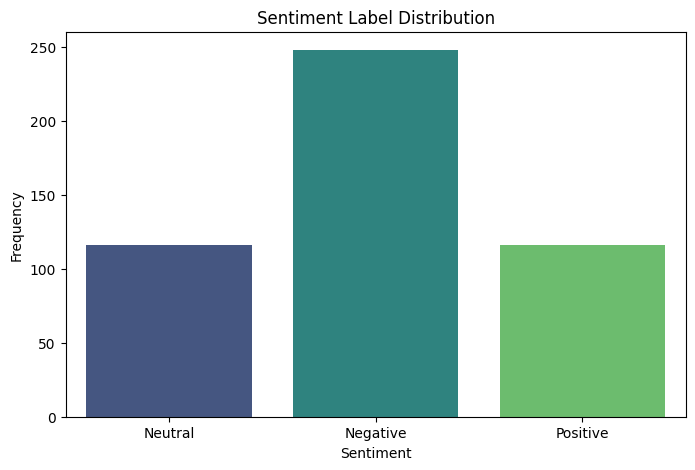

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=reddit_data, palette='viridis')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Group by company and compute average sentiment
company_sentiment = reddit_data.groupby('company').agg(
    avg_sentiment_score=('sentiment_score_roberta', 'mean'),
    positive_comments=('sentiment_label', lambda x: (x == 'Positive').sum()),
    negative_comments=('sentiment_label', lambda x: (x == 'Negative').sum()),
    neutral_comments=('sentiment_label', lambda x: (x == 'Neutral').sum())
).reset_index()

print(company_sentiment)


  company  avg_sentiment_score  positive_comments  negative_comments  \
0    intu            -0.235330                  2                 10   
1    keys             0.422705                  4                  1   
2     nio            -0.047720                  3                  5   
3    nvda            -0.152090                 51                111   
4    panw            -0.216723                  0                 16   
5    powl            -0.402674                  1                  5   
6    snow            -0.053874                 17                 28   
7     sym            -0.061391                  7                 12   
8     tgt            -0.141349                  7                 15   
9     wmt            -0.106478                 24                 45   

   neutral_comments  
0                 5  
1                 1  
2                 8  
3                39  
4                10  
5                 1  
6                15  
7                 3  
8        

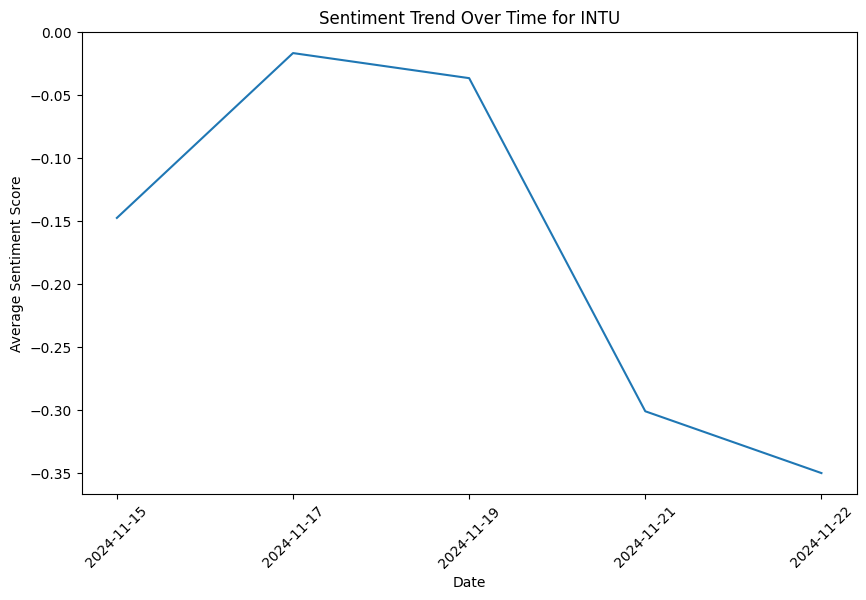

In [ ]:
# Compute daily average sentiment
daily_sentiment = reddit_data.groupby(['company', 'date']).agg(avg_sentiment=('sentiment_score_roberta', 'mean')).reset_index()

# Plot sentiment trends for a specific company
company_name = 'intu'  # Replace with a company ticker of your choice
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sentiment[daily_sentiment['company'] == company_name], x='date', y='avg_sentiment')
plt.title(f'Sentiment Trend Over Time for {company_name.upper()}')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:

# Standardize column names
reddit_data.rename(columns={'created_utc': 'date'}, inplace=True)


In [ ]:
reddit_data.head()

,text,company,date,sentiment_score_roberta,sentiment_label
0,some implied moves for earnings next week up o...,intu,2024-11-17,-0.016455,Neutral
1,since i just did the work you can copy paste t...,intu,2024-11-15,-0.050959,Negative
2,intuit will say the magic word ai and their st...,intu,2024-11-21,-0.101724,Negative
3,whys isnt intuit down more thats a shitty report,intu,2024-11-21,-0.963469,Negative
4,i wanna buy intu puts cause trump wants to abo...,intu,2024-11-21,-0.933187,Negative


news data

In [ ]:
import pandas as pd

# Load the news data
news_file = '/content/drive/MyDrive/combine_news.csv'  # Update the path to your news dataset
news_data = pd.read_csv(news_file)

# Display the first few rows to ensure the file is loaded correctly
print("News Data Head:")
print(news_data.head())

# Display the column names to verify structure
print("News Data Columns:")
print(news_data.columns)


News Data Head:
    Company                                              Title  \
0  news_nio        "NIO's Q3 Earnings Preview: What to Expect"   
1  news_nio  NIO's Upcoming Earnings: Can the EV Maker Meet...   
2  news_nio  Analysts Predict Strong Q3 for NIO Amidst EV M...   
3  news_nio           NIO's Q3 Earnings: Key Metrics to Watch"   
4  news_nio   NIO's Expansion Plans Ahead of Earnings Release"   

           Published           Source  \
0  November 18, 2024  The Motley Fool   
1  November 17, 2024             CNBC   
2  November 16, 2024          Reuters   
3  November 15, 2024        Bloomberg   
4  November 14, 2024  Financial Times   

                                             Summary  
0  This article offered an in-depth analysis of N...  
1  CNBC examined the factors that could influence...  
2  Reuters reported on analysts' optimistic forec...  
3  Bloomberg highlighted critical metrics investo...  
4  This article discussed NIO's strategic expansi...  
News Data 

In [ ]:
#preprocessing
# Rename columns for consistency
news_data = news_data.rename(columns={
    'Published': 'date',
    'Title': 'text',
    'Company': 'company'
})

# Convert 'date' to a standardized datetime format
news_data['date'] = pd.to_datetime(news_data['date'], format='%B %d, %Y', errors='coerce')
# Standardize the 'company' field in news data
news_data['company'] = news_data['company'].str.replace('news_', '', regex=False)

# Convert all company names to lowercase to ensure consistency
news_data['company'] = news_data['company'].str.lower()

# Verify the changes
print("Updated Company Field in News Data:")
print(news_data[['company']].drop_duplicates().head())


# Check for missing values
print("Missing Values in News Data:")
print(news_data.isnull().sum())

# Drop rows with missing 'text', 'company', or 'date'
news_data = news_data.dropna(subset=['text', 'company', 'date']).reset_index(drop=True)

# Display the cleaned data
print("Cleaned News Data:")
print(news_data.head())


Updated Company Field in News Data:
   company
0      nio
10    intu
20    nvda
30    panw
40    keys
Missing Values in News Data:
company     0
text        0
date       44
Source      0
Summary     0
dtype: int64
Cleaned News Data:
  company                                               text       date  \
0     nio        "NIO's Q3 Earnings Preview: What to Expect" 2024-11-18   
1     nio  NIO's Upcoming Earnings: Can the EV Maker Meet... 2024-11-17   
2     nio  Analysts Predict Strong Q3 for NIO Amidst EV M... 2024-11-16   
3     nio           NIO's Q3 Earnings: Key Metrics to Watch" 2024-11-15   
4     nio   NIO's Expansion Plans Ahead of Earnings Release" 2024-11-14   

            Source                                            Summary  
0  The Motley Fool  This article offered an in-depth analysis of N...  
1             CNBC  CNBC examined the factors that could influence...  
2          Reuters  Reuters reported on analysts' optimistic forec...  
3        Bloomberg  Bloomber

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load Twitter-RoBERTa model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to analyze sentiment
def analyze_sentiment_roberta(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probabilities = softmax(outputs.logits, dim=-1).detach().numpy()[0]
    sentiment_score = probabilities[2] - probabilities[0]  # Positive - Negative
    return sentiment_score, probabilities

# Apply sentiment analysis to the 'text' column
print("Analyzing sentiment for news data using Twitter-RoBERTa...")
news_data['sentiment_score_roberta'], sentiment_probabilities = zip(*news_data['text'].apply(analyze_sentiment_roberta))

# Map sentiment scores to sentiment labels
def map_sentiment_label(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

news_data['sentiment_label'] = news_data['sentiment_score_roberta'].apply(map_sentiment_label)

# Display the updated data with sentiment
print("Updated News Data with Sentiment:")
print(news_data.head())


Analyzing sentiment for news data using Twitter-RoBERTa...
Updated News Data with Sentiment:
  company                                               text       date  \
0     nio        "NIO's Q3 Earnings Preview: What to Expect" 2024-11-18   
1     nio  NIO's Upcoming Earnings: Can the EV Maker Meet... 2024-11-17   
2     nio  Analysts Predict Strong Q3 for NIO Amidst EV M... 2024-11-16   
3     nio           NIO's Q3 Earnings: Key Metrics to Watch" 2024-11-15   
4     nio   NIO's Expansion Plans Ahead of Earnings Release" 2024-11-14   

            Source                                            Summary  \
0  The Motley Fool  This article offered an in-depth analysis of N...   
1             CNBC  CNBC examined the factors that could influence...   
2          Reuters  Reuters reported on analysts' optimistic forec...   
3        Bloomberg  Bloomberg highlighted critical metrics investo...   
4  Financial Times  This article discussed NIO's strategic expansi...   

   sentiment_scor

In [ ]:
# Save the processed news data to a CSV file
news_data.to_csv("processed_news_data.csv", index=False)
print("Processed news data saved to 'processed_news_data.csv'")


Processed news data saved to 'processed_news_data.csv'


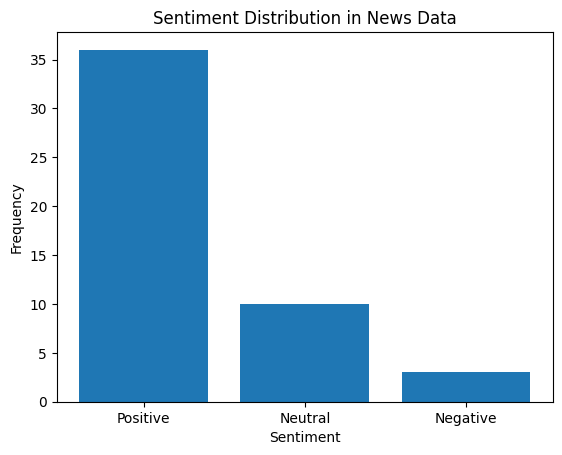

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = news_data['sentiment_label'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Distribution in News Data")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Check unique company values in both datasets
print("Unique companies in Reddit data:", reddit_data['company'].unique())
print("Unique companies in News data:", news_data['company'].unique())


Unique companies in Reddit data: ['intu' 'keys' 'nio' 'nvda' 'panw' 'powl' 'snow' 'sym' 'tgt' 'wmt']
Unique companies in News data: ['nio' 'intu' 'panw' 'keys' 'snow']


In [ ]:
# List all companies in Reddit data
reddit_companies = reddit_data['company'].unique()

# List all companies in News data
news_companies = news_data['company'].unique()

# Find missing companies
missing_companies = [comp for comp in reddit_companies if comp not in news_companies]
print("Missing companies in News data:", missing_companies)


Missing companies in News data: ['nvda', 'powl', 'sym', 'tgt', 'wmt']


In [ ]:
# Filter news data for the missing companies (check if there's any mislabeling)
for comp in missing_companies:
    filtered = news_data[news_data['company'].str.contains(comp, case=False, na=False)]
    print(f"Entries for {comp}:")
    print(filtered)


Entries for nvda:
Empty DataFrame
Columns: [company, text, date, Source, Summary, sentiment_score_roberta, sentiment_label]
Index: []
Entries for powl:
Empty DataFrame
Columns: [company, text, date, Source, Summary, sentiment_score_roberta, sentiment_label]
Index: []
Entries for sym:
Empty DataFrame
Columns: [company, text, date, Source, Summary, sentiment_score_roberta, sentiment_label]
Index: []
Entries for tgt:
Empty DataFrame
Columns: [company, text, date, Source, Summary, sentiment_score_roberta, sentiment_label]
Index: []
Entries for wmt:
Empty DataFrame
Columns: [company, text, date, Source, Summary, sentiment_score_roberta, sentiment_label]
Index: []


In [ ]:
news_data.head()

,company,text,date,Source,Summary,sentiment_score_roberta,sentiment_label
0,nio,"""NIO's Q3 Earnings Preview: What to Expect""",2024-11-18,The Motley Fool,This article offered an in-depth analysis of N...,0.073710,Positive
1,nio,NIO's Upcoming Earnings: Can the EV Maker Meet...,2024-11-17,CNBC,CNBC examined the factors that could influence...,0.225873,Positive
2,nio,Analysts Predict Strong Q3 for NIO Amidst EV M...,2024-11-16,Reuters,Reuters reported on analysts' optimistic forec...,0.862460,Positive
3,nio,"NIO's Q3 Earnings: Key Metrics to Watch""",2024-11-15,Bloomberg,Bloomberg highlighted critical metrics investo...,0.103807,Positive
4,nio,"NIO's Expansion Plans Ahead of Earnings Release""",2024-11-14,Financial Times,This article discussed NIO's strategic expansi...,0.076677,Positive


In [ ]:
# Check unique companies in News Data
unique_news_companies = news_data['company'].unique()
print("Unique companies in News Data:")
print(unique_news_companies)
print(f"Total companies in News Data: {len(unique_news_companies)}")

# Check unique companies in Reddit Data
unique_reddit_companies = reddit_data['company'].unique()
print("\nUnique companies in Reddit Data:")
print(unique_reddit_companies)
print(f"Total companies in Reddit Data: {len(unique_reddit_companies)}")

# Check unique companies in Stock Data
unique_stock_companies = stock_data['Company'].unique()
print("\nUnique companies in Stock Data:")
print(unique_stock_companies)
print(f"Total companies in Stock Data: {len(unique_stock_companies)}")


Unique companies in News Data:
['nio' 'intu' 'panw' 'keys' 'snow']
Total companies in News Data: 5

Unique companies in Reddit Data:
['intu' 'keys' 'nio' 'nvda' 'panw' 'powl' 'snow' 'sym' 'tgt' 'wmt']
Total companies in Reddit Data: 10

Unique companies in Stock Data:
['price_wmt' 'price_intu' 'price_snow' 'price_powl' 'price_nio'
 'price_panw' 'price_sym' 'price_tgt' 'price_nvda' 'price_keys']
Total companies in Stock Data: 10


In [ ]:
# Inspect the unique companies in the original news dataset (if you have it):
original_news_data = pd.read_csv("/content/drive/MyDrive/combine_news.csv")
print(original_news_data['Company'].unique())


['news_nio' 'news_intu' 'news_nvda' 'news_panw' 'news_keys' 'news_sym'
 'news_tgt' 'news_wmt' 'news_snow' 'news_powl']


In [ ]:
# Remove the 'news_' prefix to align with other datasets
news_data['company'] = news_data['company'].str.replace('news_', '')
print(news_data['company'].unique())


['nio' 'intu' 'panw' 'keys' 'snow']


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load the News Dataset
news_data = pd.read_csv('/content/drive/MyDrive/combine_news.csv')  # Replace with actual file path

# Step 1: Fix Company Names in News Data
# Remove "news_" prefix and convert to lowercase for consistency
news_data['company'] = news_data['Company'].str.replace('news_', '').str.lower()

# Verify unique companies in the fixed news data
print("Unique Companies in News Data (After Fix):", news_data['company'].unique())

# Step 2: Reprocess Sentiment Analysis Using Twitter-RoBERTa

# Load the Twitter-RoBERTa model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function for Sentiment Analysis Using Twitter-RoBERTa
def analyze_sentiment_roberta(text):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        outputs = model(**inputs)
        probabilities = softmax(outputs.logits, dim=-1).detach().numpy()[0]
        sentiment_score = probabilities[2] - probabilities[0]  # Positive - Negative
        sentiment_label = "Positive" if sentiment_score > 0.05 else "Negative" if sentiment_score < -0.05 else "Neutral"
        return sentiment_score, sentiment_label
    except Exception as e:
        # Handle edge cases where text is missing or too long
        return None, "Unknown"

# Analyze sentiment for the "Summary" column in the news data
news_data[['sentiment_score_roberta', 'sentiment_label']] = news_data['Summary'].apply(
    lambda x: pd.Series(analyze_sentiment_roberta(str(x)))
)

# Step 3: Verify Processed News Data
print("Processed News Data Head:")
print(news_data.head())

# Step 4: Save Preprocessed News Data (Optional)
news_data.to_csv('/content/processed_news_data.csv', index=False)
print("Preprocessed news data saved to '/content/processed_news_data.csv'")


Unique Companies in News Data (After Fix): ['nio' 'intu' 'nvda' 'panw' 'keys' 'sym' 'tgt' 'wmt' 'snow' 'powl']
Processed News Data Head:
    Company                                              Title  \
0  news_nio        "NIO's Q3 Earnings Preview: What to Expect"   
1  news_nio  NIO's Upcoming Earnings: Can the EV Maker Meet...   
2  news_nio  Analysts Predict Strong Q3 for NIO Amidst EV M...   
3  news_nio           NIO's Q3 Earnings: Key Metrics to Watch"   
4  news_nio   NIO's Expansion Plans Ahead of Earnings Release"   

           Published           Source  \
0  November 18, 2024  The Motley Fool   
1  November 17, 2024             CNBC   
2  November 16, 2024          Reuters   
3  November 15, 2024        Bloomberg   
4  November 14, 2024  Financial Times   

                                             Summary company  \
0  This article offered an in-depth analysis of N...     nio   
1  CNBC examined the factors that could influence...     nio   
2  Reuters reported on anal

<ipython-input-36-d9f7a55e255a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


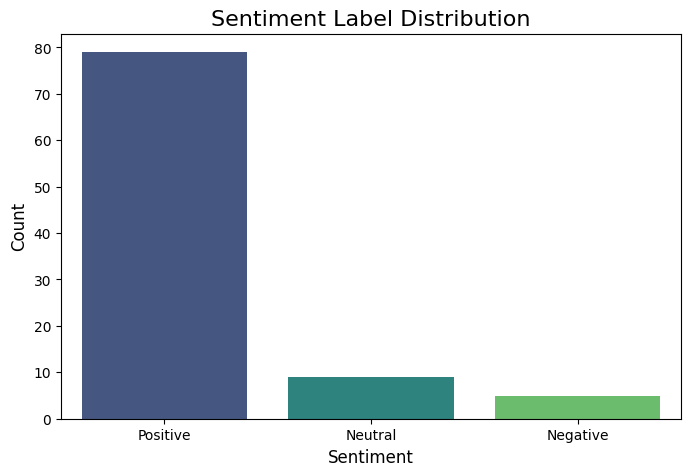

In [ ]:
# Count the number of each sentiment
sentiment_counts = news_data['sentiment_label'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Label Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


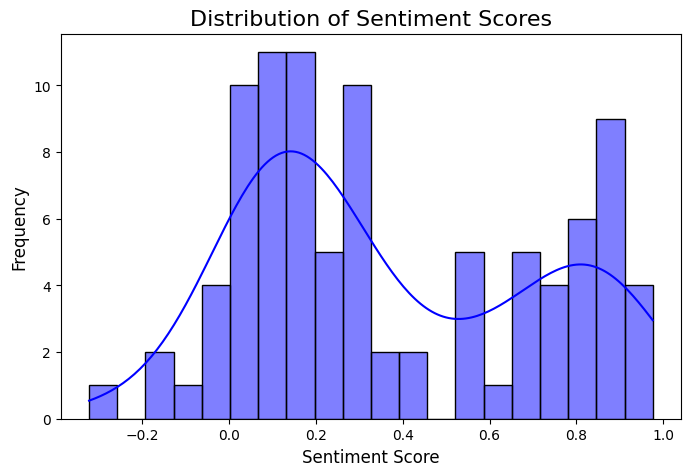

In [ ]:
# Plot histogram of sentiment scores
plt.figure(figsize=(8, 5))
sns.histplot(news_data['sentiment_score_roberta'], bins=20, kde=True, color="blue")
plt.title("Distribution of Sentiment Scores", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


<ipython-input-38-01155f46b6f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.values, y=source_counts.index, palette="coolwarm")


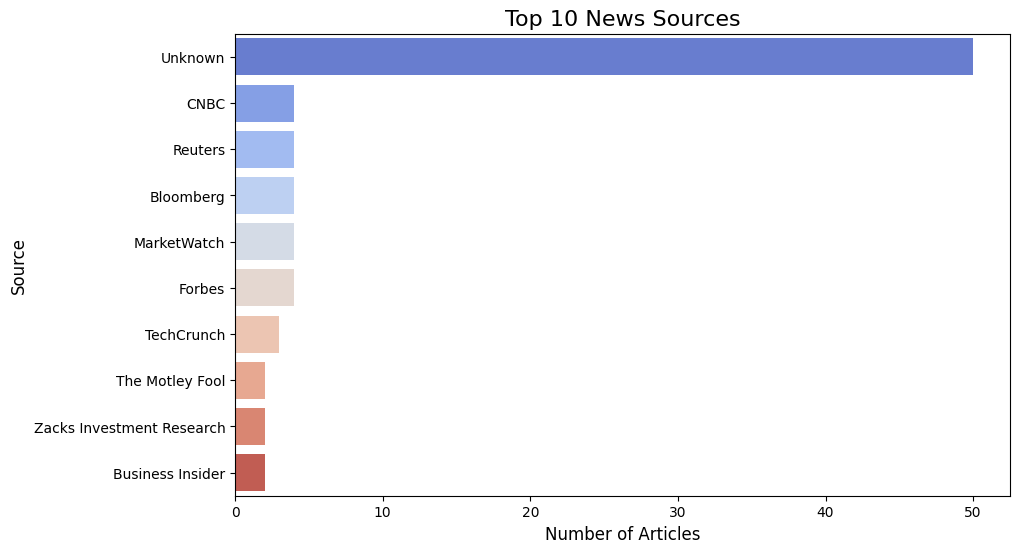

In [ ]:
# Count the number of articles per source
source_counts = news_data['Source'].value_counts().head(10)  # Top 10 sources

# Plot the source distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.values, y=source_counts.index, palette="coolwarm")
plt.title("Top 10 News Sources", fontsize=16)
plt.xlabel("Number of Articles", fontsize=12)
plt.ylabel("Source", fontsize=12)
plt.show()


In [ ]:
# Replace 'Published' with 'date' (cleaned and properly formatted)
news_data.rename(columns={'Published': 'date'}, inplace=True)

# Convert the 'date' column to datetime format
def clean_date_format(date_str):
    try:
        # Try parsing the date string to datetime
        return pd.to_datetime(date_str)
    except Exception as e:
        print(f"Error parsing date: {date_str}. Setting as NaT. Error: {e}")
        return pd.NaT  # Set invalid dates as NaT (Not a Time)

# Apply the function to clean the 'date' column
news_data['date'] = news_data['date'].apply(clean_date_format)

# Drop rows with invalid dates
news_data = news_data.dropna(subset=['date'])

# Drop the 'Company' column as requested
news_data.drop(columns=['Company'], inplace=True)

# Verify the updated DataFrame
print(news_data.info())
print(news_data.head())


Error parsing date: Unknown. Setting as NaT. Error: Unknown datetime string format, unable to parse: Unknown, at position 0
Error parsing date: Unknown. Setting as NaT. Error: Unknown datetime string format, unable to parse: Unknown, at position 0
Error parsing date: Unknown. Setting as NaT. Error: Unknown datetime string format, unable to parse: Unknown, at position 0
Error parsing date: Unknown. Setting as NaT. Error: Unknown datetime string format, unable to parse: Unknown, at position 0
Error parsing date: Unknown. Setting as NaT. Error: Unknown datetime string format, unable to parse: Unknown, at position 0
Error parsing date: Unknown. Setting as NaT. Error: Unknown datetime string format, unable to parse: Unknown, at position 0
Error parsing date: Unknown. Setting as NaT. Error: Unknown datetime string format, unable to parse: Unknown, at position 0
Error parsing date: Unknown. Setting as NaT. Error: Unknown datetime string format, unable to parse: Unknown, at position 0
Error pa

<ipython-input-39-04a40bb5e8d8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data.drop(columns=['Company'], inplace=True)


<ipython-input-40-e21aac21227e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['date'] = pd.to_datetime(news_data['date'])


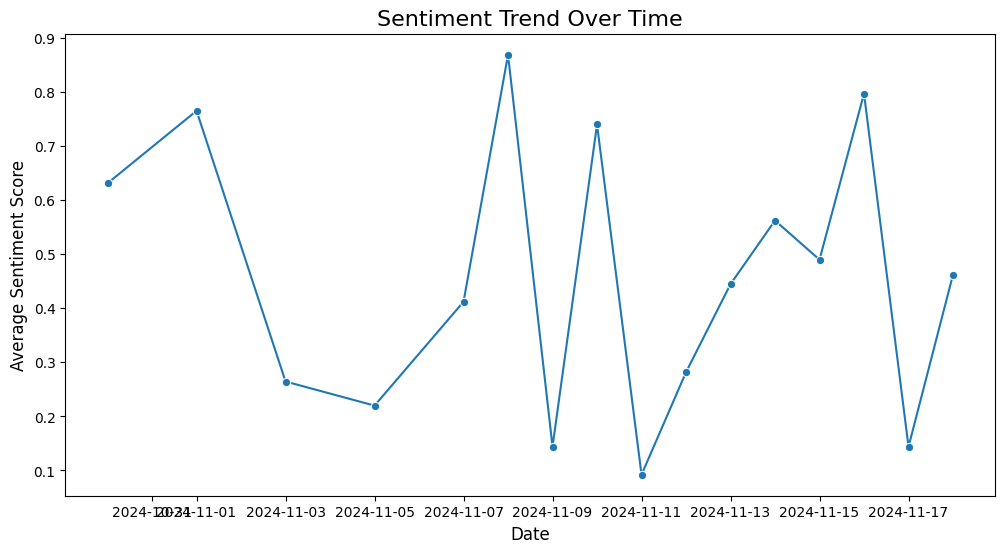

In [ ]:
# Convert 'Published' to datetime and extract the date
news_data['date'] = pd.to_datetime(news_data['date'])

# Group by date and calculate average sentiment
sentiment_trend = news_data.groupby('date')['sentiment_score_roberta'].mean().reset_index()

# Plot sentiment over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trend, x='date', y='sentiment_score_roberta', marker='o')
plt.title("Sentiment Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.show()


In [ ]:
# Check if all dates are valid and in the correct format
print(news_data.info())
print(news_data['date'].head())

# Verify the range of dates in the data
print(f"Date range: {news_data['date'].min()} to {news_data['date'].max()}")



<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 81
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Title                    49 non-null     object        
 1   date                     49 non-null     datetime64[ns]
 2   Source                   49 non-null     object        
 3   Summary                  49 non-null     object        
 4   company                  49 non-null     object        
 5   sentiment_score_roberta  49 non-null     float32       
 6   sentiment_label          49 non-null     object        
dtypes: datetime64[ns](1), float32(1), object(5)
memory usage: 2.9+ KB
None
0   2024-11-18
1   2024-11-17
2   2024-11-16
3   2024-11-15
4   2024-11-14
Name: date, dtype: datetime64[ns]
Date range: 2024-10-30 00:00:00 to 2024-11-18 00:00:00


headlines preprocessing

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import pandas as pd
import torch
import re

# Load Headlines Data
headlines_data = pd.read_csv('/content/drive/MyDrive/combined_headline.csv')

# Preprocessing Headlines: Clean the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning to the 'Headline' column
headlines_data['cleaned_headline'] = headlines_data['Headline'].apply(clean_text)

# Sentiment Analysis using Twitter-RoBERTa
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to predict sentiment scores using RoBERTa
def analyze_sentiment_roberta(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    scores = softmax(outputs.logits, dim=-1).detach().numpy()[0]
    sentiment_score = scores[2] - scores[0]  # Positive - Negative
    return sentiment_score

# Apply Sentiment Analysis to the 'cleaned_headline' column
headlines_data['sentiment_score_roberta'] = headlines_data['cleaned_headline'].apply(analyze_sentiment_roberta)

# Map sentiment scores to labels
def assign_sentiment_label(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Add sentiment labels to the DataFrame
headlines_data['sentiment_label'] = headlines_data['sentiment_score_roberta'].apply(assign_sentiment_label)

# Drop unnecessary columns if needed
headlines_data = headlines_data.drop(columns=['Headline', 'cleaned_headline'])

# Display updated DataFrame
print("Processed Headlines Data:")
print(headlines_data.head())

# Save the preprocessed data (if needed)
headlines_data.to_csv('/content/preprocessed_headlines.csv', index=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Processed Headlines Data:
                  Date                   Company  sentiment_score_roberta  \
0  2024-11-21 18:44:35  Snowflake_SNOW_Headlines                 0.435513   
1  2024-11-21 18:44:35  Snowflake_SNOW_Headlines                 0.729600   
2  2024-11-21 18:44:35  Snowflake_SNOW_Headlines                 0.113865   
3  2024-11-21 18:44:35  Snowflake_SNOW_Headlines                 0.683216   
4  2024-11-21 18:44:35  Snowflake_SNOW_Headlines                 0.930498   

  sentiment_label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  


In [ ]:
import pandas as pd
import re

# Specify the path to the news data file
news_data_path = '/content/drive/MyDrive/combined_headline.csv' # Replace with your actual file path

# Load the News Data
news_data = pd.read_csv(news_data_path)

# Step 1: Extract abbreviation (e.g., "SNOW")
def extract_abbr(company_str):
    match = re.search(r'_([A-Z]{1,5})_', company_str)
    return match.group(1).lower() if match else None

# Step 2: Extract full name (e.g., "Snowflake")
def extract_full_name(company_str):
    match = re.search(r'(\b[A-Za-z]+\b)_[A-Z]{1,5}_', company_str)
    return match.group(1) if match else None

# Apply extraction functions
news_data['company_abbr'] = news_data['Company'].apply(extract_abbr)
news_data['company_full_name'] = news_data['Company'].apply(extract_full_name)

# Step 3: Map to standard full names if needed (optional)
abbr_to_full_name = {
    "snow": "Snowflake",
    "nvda": "NVIDIA",
    "intu": "Intuit",
    "wmt": "Walmart",
    "nio": "NIO",
    "panw": "Palo Alto Networks",
    "keys": "Keysight Technologies",
    "sym": "Symantec",
    "tgt": "Target",
    "powl": "Powell Industries"
}

# Map extracted abbreviations to standard full names
news_data['company_full_name'] = news_data['company_abbr'].map(abbr_to_full_name).fillna(news_data['company_full_name'])

# Drop the original 'Company' column if not needed
news_data = news_data.drop(columns=['Company'])

# Save the updated news data (optional)
news_data.to_csv('/content/preprocessed_headlines.csv', index=False)  # Update save path if needed

# Display the updated DataFrame
print(news_data.head())


                                            Headline                 Date  \
0  These Stocks Moved the Most Today: Nvidia, Alp...  2024-11-21 18:44:35   
1  MongoDB, Other Data Software Stocks Rally On S...  2024-11-21 18:44:35   
2      Why Are Snowflake (SNOW) Shares Soaring Today  2024-11-21 18:44:35   
3       Here's Why Snowflake Stock Skyrocketed Today  2024-11-21 18:44:35   
4  Snowflake Stock Has Best Day Ever After Earnin...  2024-11-21 18:44:35   

  company_abbr company_full_name  
0         snow         Snowflake  
1         snow         Snowflake  
2         snow         Snowflake  
3         snow         Snowflake  
4         snow         Snowflake  


In [ ]:
import pandas as pd

# Path to the news data file
news_data_path = '/content/drive/MyDrive/combine_news.csv'  # Update with the correct file path

# Step 1: Load the data
try:
    news_data = pd.read_csv(news_data_path)
    print("Original DataFrame:")
    print(news_data.head())
except Exception as e:
    print(f"Error loading the file: {e}")
    exit()

# Step 2: Extract the 'Published' column into a 'date' column
if 'Published' in news_data.columns:
    # Convert 'Published' to datetime format, keeping 'unknown' as is
    def convert_to_date(value):
        try:
            # Try to parse the value as a date
            return pd.to_datetime(value, errors='coerce', infer_datetime_format=True)
        except Exception:
            return 'unknown'  # Keep 'unknown' values as is

    news_data['date'] = news_data['Published'].apply(
        lambda x: convert_to_date(x) if str(x).lower() != 'unknown' else 'unknown'
    )

    print("Data after converting Published to date:")
    print(news_data[['Published', 'date']].head())
else:
    print("Column 'Published' not found in the dataset.")
    exit()

# Step 3: Drop the original 'Published' column
news_data = news_data.drop(columns=['Published'])

# Step 4: Verify the final DataFrame
print("Cleaned DataFrame:")
print(news_data.head())
print(f"Date range (excluding 'unknown'): {news_data[news_data['date'] != 'unknown']['date'].min()} to {news_data[news_data['date'] != 'unknown']['date'].max()}")

# Optional: Save the cleaned data to a new CSV file
news_data.to_csv('/content/drive/MyDrive/processed_news_data.csv', index=False)


Original DataFrame:
    Company                                              Title  \
0  news_nio        "NIO's Q3 Earnings Preview: What to Expect"   
1  news_nio  NIO's Upcoming Earnings: Can the EV Maker Meet...   
2  news_nio  Analysts Predict Strong Q3 for NIO Amidst EV M...   
3  news_nio           NIO's Q3 Earnings: Key Metrics to Watch"   
4  news_nio   NIO's Expansion Plans Ahead of Earnings Release"   

           Published           Source  \
0  November 18, 2024  The Motley Fool   
1  November 17, 2024             CNBC   
2  November 16, 2024          Reuters   
3  November 15, 2024        Bloomberg   
4  November 14, 2024  Financial Times   

                                             Summary  
0  This article offered an in-depth analysis of N...  
1  CNBC examined the factors that could influence...  
2  Reuters reported on analysts' optimistic forec...  
3  Bloomberg highlighted critical metrics investo...  
4  This article discussed NIO's strategic expansi...  
Data a

<ipython-input-3-b6fac5fe26bd>:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(value, errors='coerce', infer_datetime_format=True)


In [ ]:
 news_data.head()

,Company,Title,Source,Summary,date
0,news_nio,"""NIO's Q3 Earnings Preview: What to Expect""",The Motley Fool,This article offered an in-depth analysis of N...,2024-11-18 00:00:00
1,news_nio,NIO's Upcoming Earnings: Can the EV Maker Meet...,CNBC,CNBC examined the factors that could influence...,2024-11-17 00:00:00
2,news_nio,Analysts Predict Strong Q3 for NIO Amidst EV M...,Reuters,Reuters reported on analysts' optimistic forec...,2024-11-16 00:00:00
3,news_nio,"NIO's Q3 Earnings: Key Metrics to Watch""",Bloomberg,Bloomberg highlighted critical metrics investo...,2024-11-15 00:00:00
4,news_nio,"NIO's Expansion Plans Ahead of Earnings Release""",Financial Times,This article discussed NIO's strategic expansi...,2024-11-14 00:00:00


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch

# Path to the headlines dataset
headlines_file = '/content/drive/MyDrive/pattern project /combined_headline.csv'  # Update the file path

# Step 1: Load the Headlines Data
try:
    headlines_data = pd.read_csv(headlines_file)
    print("Headlines Data Loaded:")
    print(headlines_data.head())
except Exception as e:
    print(f"Error loading headlines data: {e}")
    exit()

# Step 2: Clean and Standardize Column Names
if 'Company' in headlines_data.columns:
    # Extract the company abbreviation and standardize it
    headlines_data['company'] = headlines_data['Company'].apply(lambda x: x.split('_')[1].lower())
else:
    print("Error: 'Company' column not found in headlines data.")
    exit()

# Step 3: Convert the Date Column
if 'Date' in headlines_data.columns:
    # Convert the 'Date' column to datetime format
    def convert_to_date(value):
        try:
            return pd.to_datetime(value, errors='coerce', infer_datetime_format=True)
        except Exception:
            return 'unknown'

    headlines_data['date'] = headlines_data['Date'].apply(
        lambda x: convert_to_date(x) if str(x).lower() != 'unknown' else 'unknown'
    )
    # Drop the old 'Date' column
    headlines_data = headlines_data.drop(columns=['Date'])
else:
    print("Error: 'Date' column not found in headlines data.")
    exit()

# Step 4: Extract Sentiment Using Twitter RoBERTa
print("Analyzing sentiment using Twitter-RoBERTa...")
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def analyze_sentiment_roberta(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probabilities = softmax(outputs.logits, dim=-1).detach().numpy()[0]
    compound_score = probabilities[2] - probabilities[0]  # Positive - Negative
    return compound_score, 'Positive' if compound_score > 0.05 else 'Negative' if compound_score < -0.05 else 'Neutral'

# Apply sentiment analysis to the headlines
headlines_data[['sentiment_score_roberta', 'sentiment_label']] = headlines_data['Headline'].apply(
    lambda x: pd.Series(analyze_sentiment_roberta(str(x)))
)

# Step 5: Drop Unnecessary Columns (if any)
headlines_data = headlines_data[['company', 'date', 'Headline', 'sentiment_score_roberta', 'sentiment_label']]

# Step 6: Verify the Final DataFrame
print("Processed Headlines Data:")
print(headlines_data.head())
print(f"Data Types:\n{headlines_data.dtypes}")
print(f"Date Range (excluding 'unknown'): {headlines_data[headlines_data['date'] != 'unknown']['date'].min()} to {headlines_data[headlines_data['date'] != 'unknown']['date'].max()}")

# Optional: Save the Processed Data
processed_file_path = './processed_headlines.csv'  # Update the path if needed
headlines_data.to_csv(processed_file_path, index=False)
print(f"Processed data saved to {processed_file_path}")


Headlines Data Loaded:
                                            Headline                 Date  \
0  These Stocks Moved the Most Today: Nvidia, Alp...  2024-11-21 18:44:35   
1  MongoDB, Other Data Software Stocks Rally On S...  2024-11-21 18:44:35   
2      Why Are Snowflake (SNOW) Shares Soaring Today  2024-11-21 18:44:35   
3       Here's Why Snowflake Stock Skyrocketed Today  2024-11-21 18:44:35   
4  Snowflake Stock Has Best Day Ever After Earnin...  2024-11-21 18:44:35   

                    Company  
0  Snowflake_SNOW_Headlines  
1  Snowflake_SNOW_Headlines  
2  Snowflake_SNOW_Headlines  
3  Snowflake_SNOW_Headlines  
4  Snowflake_SNOW_Headlines  


<ipython-input-3-3ce75264ae17>:31: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(value, errors='coerce', infer_datetime_format=True)


Analyzing sentiment using Twitter-RoBERTa...
Processed Headlines Data:
  company                 date  \
0    snow  2024-11-21 18:44:35   
1    snow  2024-11-21 18:44:35   
2    snow  2024-11-21 18:44:35   
3    snow  2024-11-21 18:44:35   
4    snow  2024-11-21 18:44:35   

                                            Headline  sentiment_score_roberta  \
0  These Stocks Moved the Most Today: Nvidia, Alp...                 0.953119   
1  MongoDB, Other Data Software Stocks Rally On S...                 0.714650   
2      Why Are Snowflake (SNOW) Shares Soaring Today                -0.408348   
3       Here's Why Snowflake Stock Skyrocketed Today                 0.792726   
4  Snowflake Stock Has Best Day Ever After Earnin...                 0.950332   

  sentiment_label  
0        Positive  
1        Positive  
2        Negative  
3        Positive  
4        Positive  
Data Types:
company                     object
date                        object
Headline                    object


stock preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load stock data
stock_file = '/content/drive/MyDrive/pattern project /combined_prices.csv'  # Update the path
stock_data = pd.read_csv(stock_file)

# Step 1: Ensure the 'Date' column is properly formatted
if 'Date' in stock_data.columns:
    stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
    # Replace invalid dates with 'unknown'
    stock_data['Date'].fillna('unknown', inplace=True)
else:
    print("Error: 'Date' column not found in the stock dataset.")
    exit()

# Step 2: Clean and standardize the 'Company' column
if 'Company' in stock_data.columns:
    stock_data['company'] = stock_data['Company'].apply(lambda x: x.lower())
else:
    print("Error: 'Company' column not found in the stock dataset.")
    exit()

# Step 3: Handle missing or invalid values in numerical columns
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

def clean_numeric_column(column):
    """Converts a column to numeric by removing commas and handling NaN values."""
    return column.apply(lambda x: float(str(x).replace(",", "")) if pd.notnull(x) else 0)

for col in numerical_columns:
    if col in stock_data.columns:
        stock_data[col] = clean_numeric_column(stock_data[col])
    else:
        print(f"Warning: '{col}' column not found in the stock dataset.")

# Step 4: Normalize numerical columns using StandardScaler
scaler = StandardScaler()
stock_data[numerical_columns] = scaler.fit_transform(stock_data[numerical_columns])

# Step 5: Verify and inspect the processed data
print("Processed Stock Data:")
print(stock_data.head())
print(f"Date range (excluding 'unknown'): {stock_data[stock_data['Date'] != 'unknown']['Date'].min()} to {stock_data[stock_data['Date'] != 'unknown']['Date'].max()}")

# Save the cleaned stock data (optional)
stock_data.to_csv('/content/cleaned_stock_data.csv', index=False)


Processed Stock Data:
        Date      Open      High       Low     Close    Volume    Company  \
0 2024-11-18 -0.628908 -0.636316 -0.626982 -0.632653 -0.103002  price_wmt   
1 2024-11-15 -0.630518 -0.636700 -0.625414 -0.631712 -0.213922  price_wmt   
2 2024-11-14 -0.627743 -0.631328 -0.623173 -0.630495 -0.236785  price_wmt   
3 2024-11-13 -0.627965 -0.631164 -0.620765 -0.624796 -0.277998  price_wmt   
4 2024-11-12 -0.630684 -0.632589 -0.622277 -0.627618 -0.277190  price_wmt   

     company  
0  price_wmt  
1  price_wmt  
2  price_wmt  
3  price_wmt  
4  price_wmt  
Date range (excluding 'unknown'): 2024-10-01 00:00:00 to 2024-11-20 00:00:00


<ipython-input-2-8ae787663f97>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_data['Date'].fillna('unknown', inplace=True)


In [ ]:
import pandas as pd

# Load stock data
stock_file = '/content/cleaned_stock_data.csv'  # Update the path
stock_data = pd.read_csv(stock_file)

# Extract company names by removing the "price_" prefix
if 'company' in stock_data.columns:
    stock_data['company'] = stock_data['company'].str.extract(r'price_(\w+)$').iloc[:, 0].str.lower()
else:
    raise KeyError("Error: 'company' column not found in the stock dataset.")

# Verify the changes
print("Extracted Company Names:")
print(stock_data[['company']].drop_duplicates())

# Save the cleaned stock data (optional)
stock_data.to_csv('/content/cleaned_stock_data.csv', index=False)


Extracted Company Names:
    company
0       wmt
35     intu
72     snow
108    powl
143     nio
179    panw
215     sym
249     tgt
285    nvda
321    keys


In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Company,company
0,2024-11-18,-0.628908,-0.636316,-0.626982,-0.632653,-0.103002,price_wmt,wmt
1,2024-11-15,-0.630518,-0.636700,-0.625414,-0.631712,-0.213922,price_wmt,wmt
2,2024-11-14,-0.627743,-0.631328,-0.623173,-0.630495,-0.236785,price_wmt,wmt
3,2024-11-13,-0.627965,-0.631164,-0.620765,-0.624796,-0.277998,price_wmt,wmt
4,2024-11-12,-0.630684,-0.632589,-0.622277,-0.627618,-0.277190,price_wmt,wmt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# File paths
reddit_file = '/content/drive/MyDrive/pattern project /cleaned_reddit_data.csv'
news_file = '/content/drive/MyDrive/pattern project /processed_news_data.csv'
headlines_file = '/content/drive/MyDrive/pattern project /preprocessed_headlines.csv'
stock_file = '/content/cleaned_stock_data.csv'

# Load datasets
reddit_data = pd.read_csv(reddit_file)
news_data = pd.read_csv(news_file)
headlines_data = pd.read_csv(headlines_file)
stock_data = pd.read_csv(stock_file)

# Print basic information about each dataset
print("Reddit Data Info:")
print(reddit_data.info())
print(reddit_data.head())

print("\nNews Data Info:")
print(news_data.info())
print(news_data.head())

print("\nHeadlines Data Info:")
print(headlines_data.info())
print(headlines_data.head())

print("\nStock Data Info:")
print(stock_data.info())
print(stock_data.head())


Reddit Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             480 non-null    object
 1   sentiment_score  480 non-null    int64 
 2   company          480 non-null    object
 3   date             480 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.1+ KB
None
                                                text  sentiment_score company  \
0  Some implied moves for earnings next week( up ...               81    intu   
1  since I just did the work; you can copy paste ...               67    intu   
2  Intuit will say the magic word (AI) and their ...                7    intu   
3  Why’s isn’t intuit down more? That’s a shitty ...                5    intu   
4  I wanna buy INTU puts cause trump wants to abo...                3    intu   

         date  
0  2024-11-17  
1  2024-11-15  
2  2024-11-21  
3

In [ ]:
print(reddit_data.head())
print(news_data.head())
print(headlines_data.head())
print(stock_data.head())


                                                text  sentiment_score company  \
0  Some implied moves for earnings next week( up ...               81    intu   
1  since I just did the work; you can copy paste ...               67    intu   
2  Intuit will say the magic word (AI) and their ...                7    intu   
3  Why’s isn’t intuit down more? That’s a shitty ...                5    intu   
4  I wanna buy INTU puts cause trump wants to abo...                3    intu   

        date  
0 2024-11-17  
1 2024-11-15  
2 2024-11-21  
3 2024-11-21  
4 2024-11-21  
    Company                                              Title  \
0  news_nio        "NIO's Q3 Earnings Preview: What to Expect"   
1  news_nio  NIO's Upcoming Earnings: Can the EV Maker Meet...   
2  news_nio  Analysts Predict Strong Q3 for NIO Amidst EV M...   
3  news_nio           NIO's Q3 Earnings: Key Metrics to Watch"   
4  news_nio   NIO's Expansion Plans Ahead of Earnings Release"   

            Source        

In [ ]:
news_data['company'] = news_data['company'].apply(lambda x: x.split('_')[-1].lower())
print(news_data.head())


  company                                              Title           Source  \
0     nio        "NIO's Q3 Earnings Preview: What to Expect"  The Motley Fool   
1     nio  NIO's Upcoming Earnings: Can the EV Maker Meet...             CNBC   
2     nio  Analysts Predict Strong Q3 for NIO Amidst EV M...          Reuters   
3     nio           NIO's Q3 Earnings: Key Metrics to Watch"        Bloomberg   
4     nio   NIO's Expansion Plans Ahead of Earnings Release"  Financial Times   

                                             Summary       date  
0  This article offered an in-depth analysis of N... 2024-11-18  
1  CNBC examined the factors that could influence... 2024-11-17  
2  Reuters reported on analysts' optimistic forec... 2024-11-16  
3  Bloomberg highlighted critical metrics investo... 2024-11-15  
4  This article discussed NIO's strategic expansi... 2024-11-14  


In [ ]:
# Merge Reddit and Stock data
reddit_stock_merged = pd.merge(reddit_data, stock_data, on=['company', 'date'], how='outer')

# Merge News data
news_merged = pd.merge(news_data, reddit_stock_merged, on=['company', 'date'], how='outer')

# Merge Headlines data
final_merged_data = pd.merge(headlines_data, news_merged, on=['company', 'date'], how='outer')
# Inspect final merged dataset
print("Final Merged Dataset Info:")
print(final_merged_data.info())
print(final_merged_data.head())

# Save final merged dataset (optional)
final_merged_data.to_csv('final_merged_dataset.csv', index=False)



Final Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Headline         289 non-null    object        
 1   date             1080 non-null   datetime64[ns]
 2   company          1124 non-null   object        
 3   Title            121 non-null    object        
 4   Source           121 non-null    object        
 5   Summary          121 non-null    object        
 6   text             480 non-null    object        
 7   sentiment_score  480 non-null    float64       
 8   Open             492 non-null    float64       
 9   High             492 non-null    float64       
 10  Low              492 non-null    float64       
 11  Close            492 non-null    float64       
 12  Volume           492 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 117.7+ K

# **Actual code implementation**

# **sentiment analysis for Reddit , news and headlines**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import pandas as pd
import torch

# Load Reddit data
reddit_file = '/content/drive/MyDrive/pattern project /cleaned_reddit_data.csv'  # Update path
reddit_data = pd.read_csv(reddit_file)

# Initialize Twitter-RoBERTa
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to calculate sentiment score
def analyze_sentiment_roberta(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probabilities = softmax(outputs.logits, dim=-1).detach().numpy()[0]
    sentiment_score = probabilities[2] - probabilities[0]  # Positive - Negative
    return sentiment_score

# Apply sentiment analysis to Reddit data
reddit_data['sentiment_score'] = reddit_data['text'].apply(lambda x: analyze_sentiment_roberta(str(x)))


# Save the updated Reddit data
reddit_data.to_csv('reddit_with_sentiment.csv', index=False)
print("Reddit sentiment scores added!")


Reddit sentiment scores added!


In [18]:
def assign_sentiment_label(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply the function to the sentiment score column
reddit_data['sentiment_label'] = reddit_data['sentiment_score'].apply(assign_sentiment_label)

# Display the updated Reddit dataset
print(reddit_data.head())

# Save the updated Reddit data
reddit_data.to_csv('/content/drive/MyDrive/pattern project /reddit_with_sentiment.csv', index=False)
print("Reddit sentiment scores added!")



                                                text  sentiment_score company  \
0  Some implied moves for earnings next week( up ...        -0.070936    intu   
1  since I just did the work; you can copy paste ...        -0.001532    intu   
2  Intuit will say the magic word (AI) and their ...         0.090870    intu   
3  Why’s isn’t intuit down more? That’s a shitty ...        -0.942362    intu   
4  I wanna buy INTU puts cause trump wants to abo...        -0.901316    intu   

         date sentiment_label  
0  2024-11-17        Negative  
1  2024-11-15         Neutral  
2  2024-11-21        Positive  
3  2024-11-21        Negative  
4  2024-11-21        Negative  
Reddit sentiment scores added!


In [ ]:
# Load News data
news_file = '/content/drive/MyDrive/pattern project /processed_news_data.csv'  # Update path
news_data = pd.read_csv(news_file)

# Initialize FinBERT
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to calculate sentiment score
def analyze_sentiment_finbert(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probabilities = softmax(outputs.logits, dim=-1).detach().numpy()[0]
    sentiment_score = probabilities[2] - probabilities[0]  # Positive - Negative
    return sentiment_score

# Apply sentiment analysis to News data
news_data['sentiment_score'] = news_data['Summary'].apply(lambda x: analyze_sentiment_finbert(str(x)))

# Save the updated News data
news_data.to_csv('news_with_sentiment.csv', index=False)
print("News sentiment scores added!")


pytorch_model.bin:  91%|######### | 398M/439M [00:00<?, ?B/s]

News sentiment scores added!


In [ ]:
news_data.head()

,Company,Title,Source,Summary,date,sentiment_score
0,news_nio,"""NIO's Q3 Earnings Preview: What to Expect""",The Motley Fool,This article offered an in-depth analysis of N...,2024-11-18 00:00:00,-9.999990e-01
1,news_nio,NIO's Upcoming Earnings: Can the EV Maker Meet...,CNBC,CNBC examined the factors that could influence...,2024-11-17 00:00:00,-9.994034e-01
2,news_nio,Analysts Predict Strong Q3 for NIO Amidst EV M...,Reuters,Reuters reported on analysts' optimistic forec...,2024-11-16 00:00:00,8.302180e-08
3,news_nio,"NIO's Q3 Earnings: Key Metrics to Watch""",Bloomberg,Bloomberg highlighted critical metrics investo...,2024-11-15 00:00:00,-9.999529e-01
4,news_nio,"NIO's Expansion Plans Ahead of Earnings Release""",Financial Times,This article discussed NIO's strategic expansi...,2024-11-14 00:00:00,-9.999458e-01


In [17]:
# Load the news dataset
news_file = '/content/drive/MyDrive/pattern project /news_with_sentiment.csv'  # Update with your actual file path
news_data = pd.read_csv(news_file)

def assign_sentiment_label(score):
    """Assign sentiment label based on score thresholds."""
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Assuming FinBERT sentiment scores are already calculated
news_data['sentiment_label'] = news_data['sentiment_score'].apply(assign_sentiment_label)

# Display the updated News dataset
print("Updated News Data with Sentiment Labels:")
print(news_data.head())

 # Save the updated Headlines data
news_data.to_csv('/content/drive/MyDrive/pattern project /news_with_sentiment.csv', index=False)
print("News sentiment scores added!")


Updated News Data with Sentiment Labels:
                                               Title           Source  \
0        "NIO's Q3 Earnings Preview: What to Expect"  The Motley Fool   
1  NIO's Upcoming Earnings: Can the EV Maker Meet...             CNBC   
2  Analysts Predict Strong Q3 for NIO Amidst EV M...          Reuters   
3           NIO's Q3 Earnings: Key Metrics to Watch"        Bloomberg   
4   NIO's Expansion Plans Ahead of Earnings Release"  Financial Times   

                                             Summary        date  \
0  This article offered an in-depth analysis of N...  2024-11-18   
1  CNBC examined the factors that could influence...  2024-11-17   
2  Reuters reported on analysts' optimistic forec...  2024-11-16   
3  Bloomberg highlighted critical metrics investo...  2024-11-15   
4  This article discussed NIO's strategic expansi...  2024-11-14   

   sentiment_score company sentiment_label  
0    -9.999991e-01     nio        Negative  
1    -9.994034e-01   

In [ ]:
import pandas as pd

# Load the news dataset
news_file = '/content/news_with_sentiment.csv'  # Update with your actual file path
news_data = pd.read_csv(news_file)

# Transform the 'company' column
news_data['company'] = news_data['Company'].apply(lambda x: x.split('_')[-1].lower())

# Save the transformed dataset back to the same file
news_data.to_csv(news_file, index=False)

# Confirm the changes
print("Updated and saved the news data with transformed 'company' column:")
print(news_data.head())




Updated and saved the news data with transformed 'company' column:
    Company                                              Title  \
0  news_nio        "NIO's Q3 Earnings Preview: What to Expect"   
1  news_nio  NIO's Upcoming Earnings: Can the EV Maker Meet...   
2  news_nio  Analysts Predict Strong Q3 for NIO Amidst EV M...   
3  news_nio           NIO's Q3 Earnings: Key Metrics to Watch"   
4  news_nio   NIO's Expansion Plans Ahead of Earnings Release"   

            Source                                            Summary  \
0  The Motley Fool  This article offered an in-depth analysis of N...   
1             CNBC  CNBC examined the factors that could influence...   
2          Reuters  Reuters reported on analysts' optimistic forec...   
3        Bloomberg  Bloomberg highlighted critical metrics investo...   
4  Financial Times  This article discussed NIO's strategic expansi...   

                  date  sentiment_score company  
0  2024-11-18 00:00:00    -9.999991e-01     nio

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import pandas as pd
import torch
# Load Headlines data
headlines_file = '/content/drive/MyDrive/pattern project /preprocessed_headlines.csv'  # Update path
headlines_data = pd.read_csv(headlines_file)

# Initialize Twitter-RoBERTa
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


# Function to calculate sentiment score
def analyze_sentiment_roberta(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probabilities = softmax(outputs.logits, dim=-1).detach().numpy()[0]
    sentiment_score = probabilities[2] - probabilities[0]  # Positive - Negative
    return sentiment_score

# Apply sentiment analysis to Headlines data
headlines_data['sentiment_score'] = headlines_data['Headline'].apply(lambda x: analyze_sentiment_roberta(str(x)))

# Save the updated Headlines data
headlines_data.to_csv('headlines_with_sentiment.csv', index=False)
print("Headlines sentiment scores added!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Headlines sentiment scores added!


In [15]:
def assign_sentiment_label(score):
    """Assign sentiment label based on score thresholds."""
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Assuming Twitter-RoBERTa sentiment scores are already calculated
headlines_data['sentiment_label'] = headlines_data['sentiment_score'].apply(assign_sentiment_label)

# Save the updated Headlines data
headlines_data.to_csv('headlines_with_sentiment.csv', index=False)
print("Headlines sentiment scores added!")


# Display the updated Headlines dataset
print("Updated Headlines Data with Sentiment Labels:")
print(headlines_data[['Headline', 'sentiment_score', 'sentiment_label']].head())


Headlines sentiment scores added!
Updated Headlines Data with Sentiment Labels:
                                            Headline  sentiment_score  \
0  These Stocks Moved the Most Today: Nvidia, Alp...         0.953119   
1  MongoDB, Other Data Software Stocks Rally On S...         0.714650   
2      Why Are Snowflake (SNOW) Shares Soaring Today        -0.408348   
3       Here's Why Snowflake Stock Skyrocketed Today         0.792726   
4  Snowflake Stock Has Best Day Ever After Earnin...         0.950332   

  sentiment_label  
0        Positive  
1        Positive  
2        Negative  
3        Positive  
4        Positive  


In [ ]:
import pandas as pd

# File paths
reddit_file = '/content/reddit_with_sentiment.csv'
news_file = '/content/news_with_sentiment.csv'
headlines_file = '/content/headlines_with_sentiment.csv'
stock_file = '/content/cleaned_stock_data.csv'

# Load datasets
reddit_data = pd.read_csv(reddit_file)
news_data = pd.read_csv(news_file)
headlines_data = pd.read_csv(headlines_file)
stock_data = pd.read_csv(stock_file)

reddit_output = '/content/reddit_with_sentiment.csv'
news_output = '/content/news_with_sentiment.csv'
headlines_output = '/content/headlines_with_sentiment.csv'
stock_output = '/content/cleaned_stock_data.csv'


# Verify and clean datasets
def verify_and_clean(df, required_columns, dataset_name):
    print(f"\nChecking {dataset_name} Data...")
    print(df.info())

    # # Check for missing columns
    # for col in required_columns:
    #     if col not in df.columns:
    #         raise ValueError(f"Missing required column '{col}' in {dataset_name} dataset.")

    # # Handle missing data
    # df.fillna('unknown', inplace=True)

    # Verify date formatting
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        invalid_dates = df['date'].isnull().sum()
        print(f"Invalid dates in {dataset_name}: {invalid_dates}")

    # Validate company names
    if 'company' in df.columns:
        print(f"Unique companies in {dataset_name}: {df['company'].unique()}")

    return df

# Required columns for each dataset
reddit_required = ['text', 'company', 'date', 'sentiment_score_roberta', 'sentiment_label']
news_required = ['Title', 'Source', 'Summary', 'company', 'date', 'sentiment_score_roberta', 'sentiment_label']
headlines_required = ['Headline', 'date', 'company_abbr', 'company_full_name']
stock_required = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company']

# Run validation and cleaning
reddit_data = verify_and_clean(reddit_data, reddit_required, 'Reddit')
news_data = verify_and_clean(news_data, news_required, 'News')
headlines_data = verify_and_clean(headlines_data, headlines_required, 'Headlines')
stock_data = verify_and_clean(stock_data, stock_required, 'Stock')

# Align company names across all datasets
# 1. Standardize company names in Reddit Data
reddit_data['company'] = reddit_data['company'].str.lower()

# 2. Standardize company names in News Data
news_data['company'] = news_data['Company'].str.replace('news_', '', regex=False).str.lower()

# 3. Standardize company names in Headlines Data
headlines_data['company_abbr'] = headlines_data['company_abbr'].str.lower()

# 4. Ensure Stock Data company names are consistent
stock_data['company'] = stock_data['company'].str.lower()

reddit_data.to_csv(reddit_output, index=False)
news_data.to_csv(news_output, index=False)
headlines_data.to_csv(headlines_output, index=False)
stock_data.to_csv(stock_output, index=False)

# Verify unique companies in all datasets
print("Unique companies in Reddit Data:", reddit_data['company'].unique())
print("Unique companies in News Data:", news_data['company'].unique())
print("Unique companies in Headlines Data:", headlines_data['company_abbr'].unique())
print("Unique companies in Stock Data:", stock_data['company'].unique())


print("\nAll datasets verified and cleaned successfully.")




Checking Reddit Data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             480 non-null    object 
 1   sentiment_score  480 non-null    float64
 2   company          480 non-null    object 
 3   date             480 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.1+ KB
None
Invalid dates in Reddit: 0
Unique companies in Reddit: ['intu' 'keys' 'nio' 'nvda' 'panw' 'powl' 'snow' 'sym' 'tgt' 'wmt']

Checking News Data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            93 non-null     object 
 1   Source           93 non-null     object 
 2   Summary          93 non-null     object 
 3   date             49 non-null     object 
 4   sentimen

KeyError: 'Company'

In [ ]:
# Drop columns in Reddit data (none here)
# No action needed for Reddit data

# Drop columns in News data
news_data = news_data.drop(columns=['Company'], errors='ignore')

# Optionally drop 'Summary' if not required
# news_data = news_data.drop(columns=['Summary'], errors='ignore')

# Drop columns in Headlines data
headlines_data = headlines_data.drop(columns=['company_full_name'], errors='ignore')

# Drop columns in Stock data
stock_data = stock_data.drop(columns=['Company'], errors='ignore')

news_data.to_csv(news_file, index=False)
headlines_data.to_csv(headlines_file, index=False)
stock_data.to_csv(stock_file, index=False)


# Verify the updated datasets
print("Reddit Data Columns:", reddit_data.columns)
print("News Data Columns:", news_data.columns)
print("Headlines Data Columns:", headlines_data.columns)
print("Stock Data Columns:", stock_data.columns)


Reddit Data Columns: Index(['text', 'sentiment_score', 'company', 'date'], dtype='object')
News Data Columns: Index(['Title', 'Source', 'Summary', 'date', 'sentiment_score', 'company'], dtype='object')
Headlines Data Columns: Index(['Headline', 'Date', 'sentiment_score', 'company_abbr'], dtype='object')
Stock Data Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company'], dtype='object')


In [26]:
import pandas as pd

# File paths
reddit_file = '/content/drive/MyDrive/pattern project /reddit_with_sentiment.csv'
news_file = '/content/drive/MyDrive/pattern project /news_with_sentiment.csv'
headlines_file = '/content/drive/MyDrive/pattern project /headlines_with_sentiment.csv'
stock_file = '/content/drive/MyDrive/pattern project /cleaned_stock_data.csv'

# Load datasets
reddit_data = pd.read_csv(reddit_file)
news_data = pd.read_csv(news_file)
headlines_data = pd.read_csv(headlines_file)
stock_data = pd.read_csv(stock_file)

# Print basic information about each dataset
print("Reddit Data Info:")
print(reddit_data.info())
print(reddit_data.head())

print("\nNews Data Info:")
print(news_data.info())
print(news_data.head())

print("\nHeadlines Data Info:")
print(headlines_data.info())
print(headlines_data.head())

print("\nStock Data Info:")
print(stock_data.info())
print(stock_data.head())


Reddit Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             480 non-null    object 
 1   sentiment_score  480 non-null    float64
 2   company          480 non-null    object 
 3   date             480 non-null    object 
 4   sentiment_label  480 non-null    object 
dtypes: float64(1), object(4)
memory usage: 18.9+ KB
None
                                                text  sentiment_score company  \
0  Some implied moves for earnings next week( up ...        -0.070936    intu   
1  since I just did the work; you can copy paste ...        -0.001532    intu   
2  Intuit will say the magic word (AI) and their ...         0.090870    intu   
3  Why’s isn’t intuit down more? That’s a shitty ...        -0.942362    intu   
4  I wanna buy INTU puts cause trump wants to abo...        -0.901316    intu   

         da

In [25]:
reddit_file = '/content/drive/MyDrive/pattern project /reddit_with_sentiment.csv'
news_file = '/content/drive/MyDrive/pattern project /news_with_sentiment.csv'
headlines_file = '/content/drive/MyDrive/pattern project /headlines_with_sentiment.csv'
stock_file = '/content/drive/MyDrive/pattern project /cleaned_stock_data.csv'

# Load datasets
reddit_data = pd.read_csv(reddit_file)
news_data = pd.read_csv(news_file)
headlines_data = pd.read_csv(headlines_file)
stock_data = pd.read_csv(stock_file)
# Rename to 'date' if necessary

stock_data.rename(columns={'Date': 'date'}, inplace=True)
headlines_data.rename(columns={'Date': 'date'}, inplace=True)

# Save the updated data back to the CSV files
stock_data.to_csv(stock_file, index=False)
headlines_data.to_csv(headlines_file, index=False)

print("Columns renamed and changes saved back to the files!")


Columns renamed and changes saved back to the files!


Training Random Forest Classifier...
Classification Report:
              precision    recall  f1-score   support

    Decrease       0.49      0.66      0.56        41
    Increase       0.73      0.58      0.64        66

    accuracy                           0.61       107
   macro avg       0.61      0.62      0.60       107
weighted avg       0.64      0.61      0.61       107



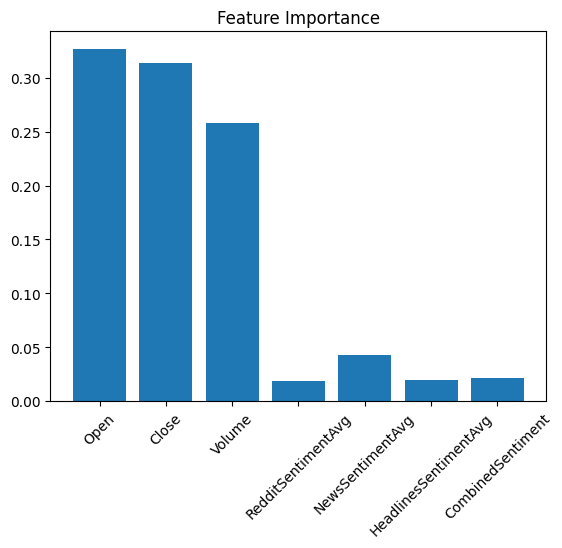

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# File Paths
reddit_file = '/content/drive/MyDrive/pattern project /reddit_with_sentiment.csv'
news_file = '/content/drive/MyDrive/pattern project /news_with_sentiment.csv'
headlines_file = '/content/drive/MyDrive/pattern project /headlines_with_sentiment.csv'
stock_file = '/content/drive/MyDrive/pattern project /cleaned_stock_data.csv'

# Load datasets
reddit_data = pd.read_csv(reddit_file)
news_data = pd.read_csv(news_file)
headlines_data = pd.read_csv(headlines_file)
stock_data = pd.read_csv(stock_file)

# Step 1: Aggregate Sentiment Scores
# Aggregating Reddit sentiment by company
reddit_sentiment = reddit_data.groupby('company').agg(
    RedditSentimentAvg=('sentiment_score', 'mean')
).reset_index()

# Aggregating News sentiment by company
news_sentiment = news_data.groupby('company').agg(
    NewsSentimentAvg=('sentiment_score', 'mean')
).reset_index()

# Aggregating Headlines sentiment by company
headlines_sentiment = headlines_data.groupby('company').agg(
    HeadlinesSentimentAvg=('sentiment_score', 'mean')
).reset_index()

# Step 2: Merge Sentiment Data with Stock Data
merged_data = stock_data.merge(reddit_sentiment, on='company', how='left')
merged_data = merged_data.merge(news_sentiment, on='company', how='left')
merged_data = merged_data.merge(headlines_sentiment, on='company', how='left')

# Fill missing values in sentiment data
merged_data[['RedditSentimentAvg', 'NewsSentimentAvg', 'HeadlinesSentimentAvg']] = merged_data[
    ['RedditSentimentAvg', 'NewsSentimentAvg', 'HeadlinesSentimentAvg']
].fillna(0)

# Step 3: Create a Weighted Combined Sentiment Score
merged_data['CombinedSentiment'] = (
    0.5 * merged_data['RedditSentimentAvg'] +
    0.3 * merged_data['NewsSentimentAvg'] +
    0.2 * merged_data['HeadlinesSentimentAvg']
)

# Step 4: Feature Engineering
# Standardize stock price features
scaler = StandardScaler()
merged_data[['Open', 'Close', 'Volume']] = scaler.fit_transform(merged_data[['Open', 'Close', 'Volume']])

# Create binary labels for stock movement
merged_data['Label'] = np.where(merged_data['Close'] > merged_data['Open'], 'Increase', 'Decrease')

# Step 5: Train-Test Split
features = merged_data[['Open', 'Close', 'Volume', 'RedditSentimentAvg', 'NewsSentimentAvg', 'HeadlinesSentimentAvg', 'CombinedSentiment']]
labels = merged_data['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Step 6: Train a Random Forest Classifier
print("Training Random Forest Classifier...")
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualize Feature Importance
importances = clf.feature_importances_
plt.bar(features.columns, importances)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()


# Managing the class imbalance using SMOTE

In [69]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define the features and target label
features = merged_data[['Open', 'Close', 'Volume', 'RedditSentimentAvg', 'NewsSentimentAvg', 'HeadlinesSentimentAvg', 'CombinedSentiment']].fillna(0)
labels = merged_data['Label']  # "Increase" or "Decrease"

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution before SMOTE:
Label
Increase    136
Decrease    113
Name: count, dtype: int64

Class distribution after SMOTE:
Label
Decrease    136
Increase    136
Name: count, dtype: int64


In [70]:
print(merged_data.columns)


Index(['date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company',
       'RedditSentimentAvg', 'NewsSentimentAvg', 'HeadlinesSentimentAvg',
       'CombinedSentiment', 'Label'],
      dtype='object')


#  **model training**

# **Playing with different model**
And also tried to improve accuracy using hyperparameter tuning and trying different models


Classification Report:
              precision    recall  f1-score   support

    Decrease       0.51      0.71      0.59        41
    Increase       0.76      0.58      0.66        66

    accuracy                           0.63       107
   macro avg       0.63      0.64      0.62       107
weighted avg       0.66      0.63      0.63       107


Confusion Matrix:
[[29 12]
 [28 38]]

Accuracy Score:
0.6261682242990654


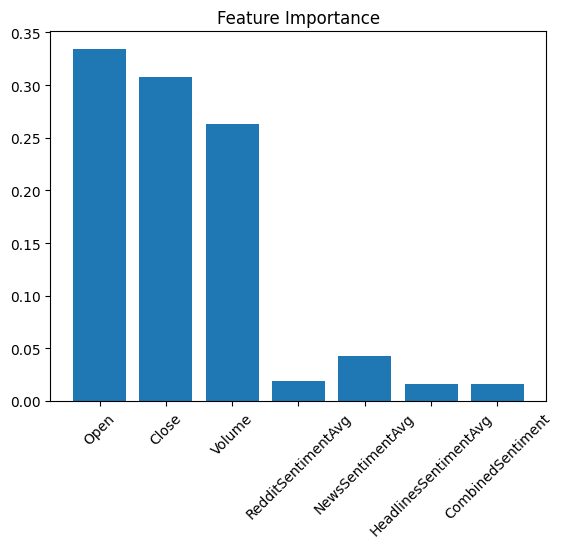

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize feature importance
importances = clf.feature_importances_
plt.bar(features.columns, importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()


In [72]:
# Add volatility
merged_data['Volatility'] = (merged_data['High'] - merged_data['Low']) / merged_data['Open']

# Add price movement
merged_data['PriceMovement'] = (merged_data['Close'] - merged_data['Open']) / merged_data['Open']

# Add rolling averages for sentiment scores
merged_data['Sentiment_3DayAvg'] = merged_data['CombinedSentiment'].rolling(window=3, min_periods=1).mean()
merged_data['Sentiment_5DayAvg'] = merged_data['CombinedSentiment'].rolling(window=5, min_periods=1).mean()


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

    Decrease       0.48      0.63      0.55        41
    Increase       0.72      0.58      0.64        66

    accuracy                           0.60       107
   macro avg       0.60      0.60      0.59       107
weighted avg       0.63      0.60      0.60       107


Accuracy Score:
0.5981308411214953

Confusion Matrix:
[[26 15]
 [28 38]]


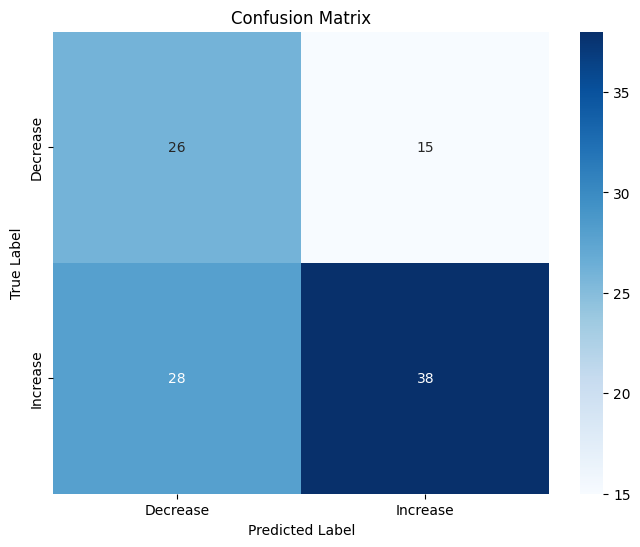

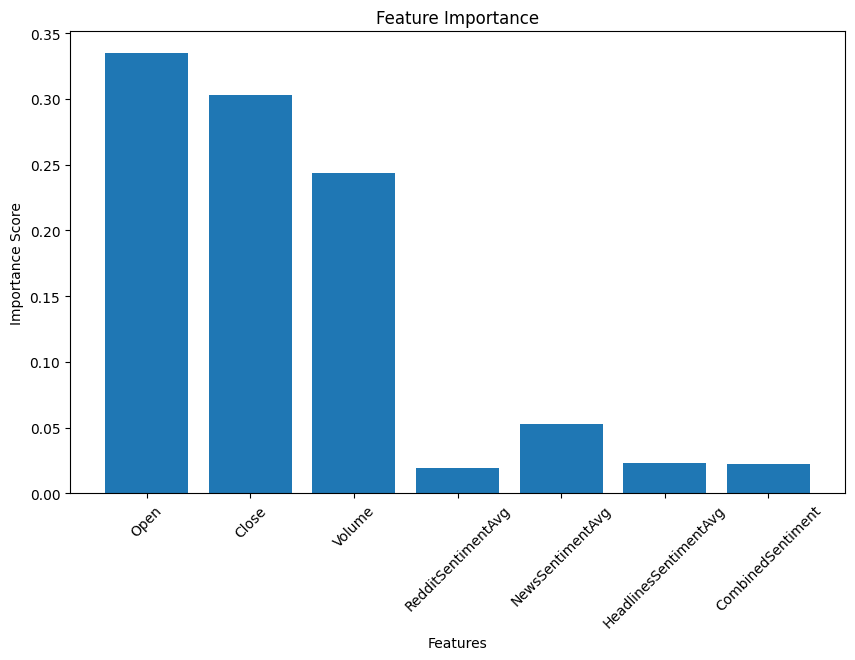

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the final Random Forest model with the best parameters
best_params = {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
final_model = RandomForestClassifier(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Fit the model on the training data
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Evaluate the final model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Visualize feature importance
feature_importances = final_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(features.columns, feature_importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode labels to numeric format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert 'Increase', 'Decrease' to 0 and 1
y_test_encoded = label_encoder.transform(y_test)

# Initialize models
models = {
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train_encoded)  # Use encoded labels
    y_pred_encoded = model.predict(X_test)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)  # Decode predictions back to original labels

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    results[name] = accuracy

# Display results
best_model = max(results, key=results.get)
print("\nBest Model:", best_model, "with Accuracy:", results[best_model])



Training GradientBoosting...

GradientBoosting Results:
Accuracy: 0.6261682242990654
Classification Report:
              precision    recall  f1-score   support

    Decrease       0.51      0.66      0.57        41
    Increase       0.74      0.61      0.67        66

    accuracy                           0.63       107
   macro avg       0.63      0.63      0.62       107
weighted avg       0.65      0.63      0.63       107

Confusion Matrix:
[[27 14]
 [26 40]]

Training XGBoost...

XGBoost Results:
Accuracy: 0.6728971962616822
Classification Report:
              precision    recall  f1-score   support

    Decrease       0.56      0.71      0.62        41
    Increase       0.78      0.65      0.71        66

    accuracy                           0.67       107
   macro avg       0.67      0.68      0.67       107
weighted avg       0.70      0.67      0.68       107

Confusion Matrix:
[[29 12]
 [23 43]]

Training LightGBM...
[LightGBM] [Info] Number of positive: 136, number 

In [48]:
import pandas as pd

# Assuming `merged_data` contains your final merged dataset
merged_data.to_csv('final_merged_data.csv', index=False)

print("Merged dataset saved as 'final_merged_data.csv'.")


Merged dataset saved as 'final_merged_data.csv'.



Training GradientBoosting...

GradientBoosting Results:
Accuracy: 0.6261682242990654
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.66      0.57        41
           1       0.74      0.61      0.67        66

    accuracy                           0.63       107
   macro avg       0.63      0.63      0.62       107
weighted avg       0.65      0.63      0.63       107

Confusion Matrix:
[[27 14]
 [26 40]]


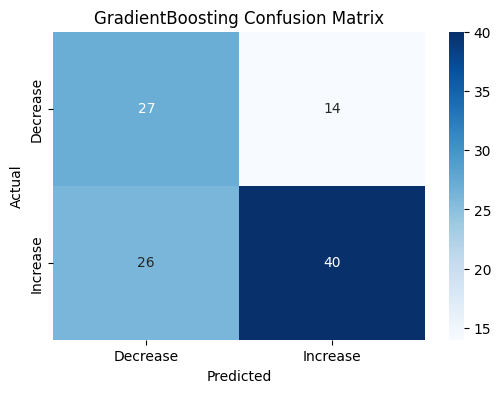


Training XGBoost...

XGBoost Results:
Accuracy: 0.6728971962616822
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62        41
           1       0.78      0.65      0.71        66

    accuracy                           0.67       107
   macro avg       0.67      0.68      0.67       107
weighted avg       0.70      0.67      0.68       107

Confusion Matrix:
[[29 12]
 [23 43]]


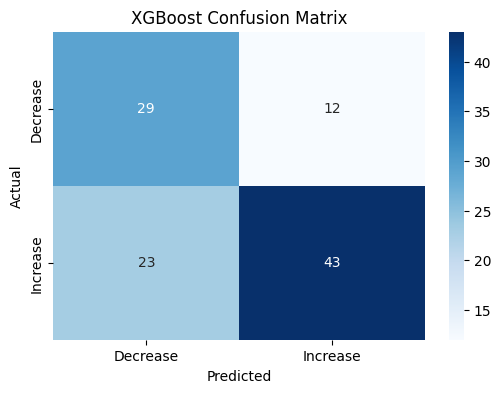


Training LightGBM...
[LightGBM] [Info] Number of positive: 136, number of negative: 113
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 249, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546185 -> initscore=0.185267
[LightGBM] [Info] Start training from score 0.185267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

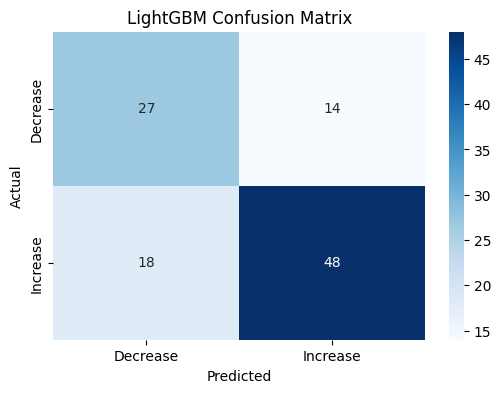


Training LogisticRegression...

LogisticRegression Results:
Accuracy: 0.5887850467289719
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.27      0.33        41
           1       0.63      0.79      0.70        66

    accuracy                           0.59       107
   macro avg       0.54      0.53      0.52       107
weighted avg       0.56      0.59      0.56       107

Confusion Matrix:
[[11 30]
 [14 52]]


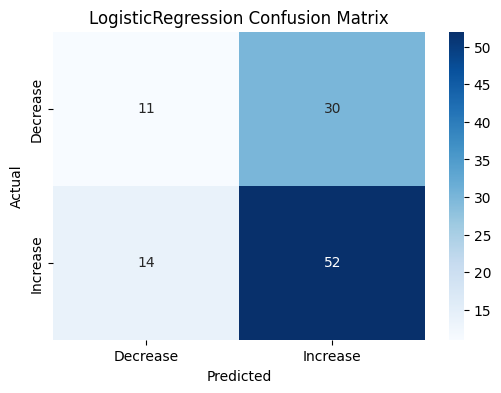


Training SVM...

SVM Results:
Accuracy: 0.5794392523364486
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.59      0.52        41
           1       0.69      0.58      0.63        66

    accuracy                           0.58       107
   macro avg       0.58      0.58      0.57       107
weighted avg       0.60      0.58      0.59       107

Confusion Matrix:
[[24 17]
 [28 38]]


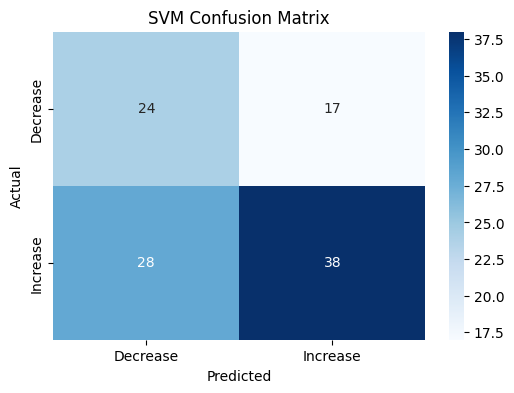

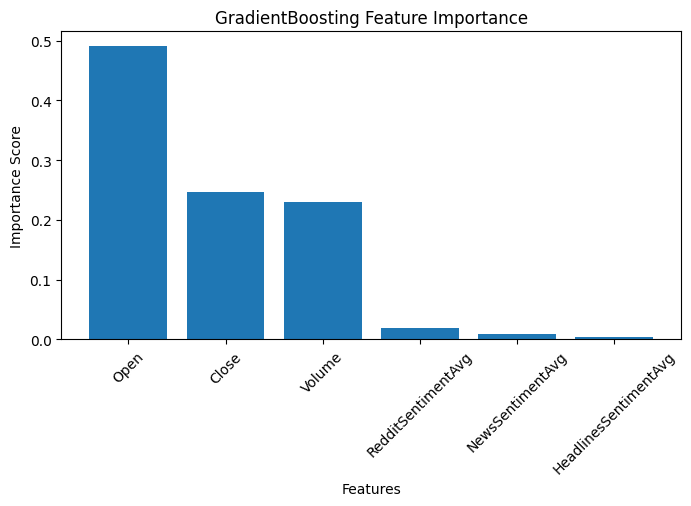

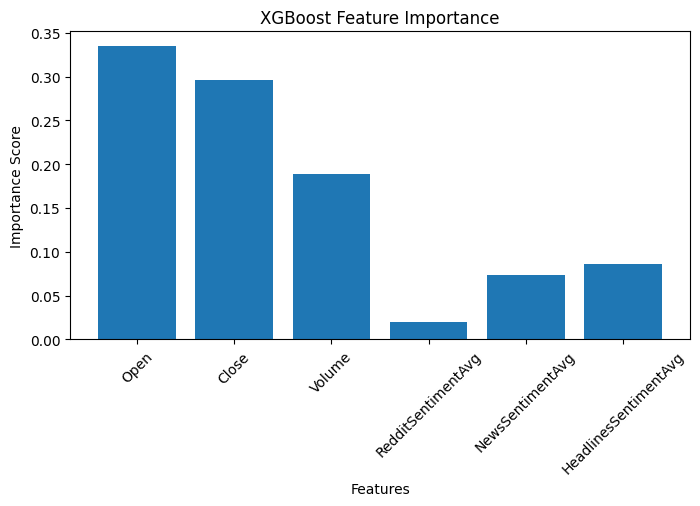

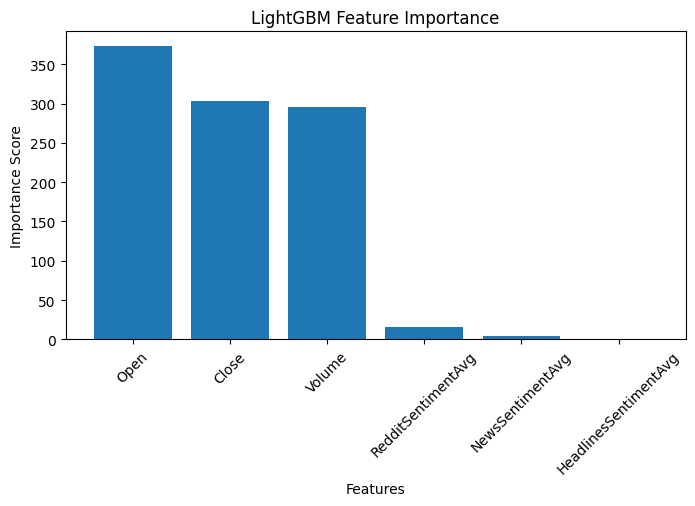


Best Model: LightGBM with Accuracy: 0.7009345794392523


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
merged_data = pd.read_csv('final_merged_data.csv')

# Encode labels to numeric
label_encoder = LabelEncoder()
merged_data['Label'] = label_encoder.fit_transform(merged_data['Label'])

# Prepare features and labels
features = merged_data[['Open', 'Close', 'Volume', 'RedditSentimentAvg', 'NewsSentimentAvg', 'HeadlinesSentimentAvg']].fillna(0)
labels = merged_data['Label']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}
feature_importance_data = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Store results
    results[name] = accuracy

    # Save feature importance (for models that support it)
    if name in ['GradientBoosting', 'XGBoost', 'LightGBM']:
        feature_importance_data[name] = model.feature_importances_

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Visualize Feature Importance
for name, importance in feature_importance_data.items():
    plt.figure(figsize=(8, 4))
    plt.bar(features.columns, importance)
    plt.title(f'{name} Feature Importance')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.show()

# Display best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]}")



In [52]:
import joblib
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']